In [1]:
import pandas as pd
import numpy as np

# IMPORT DATA

In [2]:
df1 = pd.read_csv('context.csv')

In [3]:
df2 = pd.read_csv('mobile_plan_user.csv')

In [4]:
df3 = pd.read_csv('user.csv')

In [5]:
file_path = r'mobile_plan_attr.csv'
df4 = pd.read_csv(file_path, delimiter=';', quotechar='"', engine='python')

# PART 1: CLEAN TRAIN DATA

## 1. Cleaning data context

In [6]:
df1

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
0,11156,Travel,Al?!%one,&&!!Sunny,13:00,1,0,0,0,1,0,0
1,4297,Travel,F!ri?end%(s),Sun!~ny,9 AM,1,1,0,0,1,0,0
2,13301,Travel,Frie~nd(s),!&~S!unny,15:00,1,1,0,0,1,0,0
3,9920,Travel,?Friend(s),Su%n&ny,2 PM,1,1,0,0,1,30,0
4,8424,Travel,?Fa! mily,Sun%ny,10AM,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Al!o&ne,!S&nowy,9 PM,1,1,0,0,1,0,0
11568,5645,Visit,Fa mily,Sun~&ny,8PM,1,1,0,1,0,0,1
11569,15477,Work,&A?lone,Sn?owy,6:00,1,0,0,1,0,13,1
11570,8885,Work,%Al?one,S?n%owy,7AM,1,1,1,0,1,0,0


In [7]:
df1.isna().sum()

id              0
purpose         0
go_with         0
weather         0
time            0
viettel_no_0    0
viettel_no_1    0
viettel_no_2    0
to_hanoi        0
to_other        0
score           0
direction       0
dtype: int64

In [8]:
df1.describe()

,id,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
count,11572.000000,11572.0,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000
mean,10510.221310,1.0,0.559972,0.118303,0.215347,0.784653,5.297529,0.215347
std,5479.539934,0.0,0.496412,0.322980,0.411081,0.411081,10.769802,0.411081
min,1000.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5751.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10499.500000,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,15266.250000,1.0,1.000000,0.000000,0.000000,1.000000,7.000000,0.000000
max,19999.000000,1.0,1.000000,1.000000,1.000000,1.000000,105.000000,1.000000


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11572 entries, 0 to 11571
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            11572 non-null  int64 
 1   purpose       11572 non-null  object
 2   go_with       11572 non-null  object
 3   weather       11572 non-null  object
 4   time          11572 non-null  object
 5   viettel_no_0  11572 non-null  int64 
 6   viettel_no_1  11572 non-null  int64 
 7   viettel_no_2  11572 non-null  int64 
 8   to_hanoi      11572 non-null  int64 
 9   to_other      11572 non-null  int64 
 10  score         11572 non-null  int64 
 11  direction     11572 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.1+ MB


In [10]:
import re

#### Clean string in columns 'go_with' and 'weather'

In [11]:
def clean_string(s):
    return re.sub(r'[^a-zA-Z]','',s)

In [12]:
df1.go_with = df1.go_with.apply(clean_string)

In [13]:
df1.weather = df1.weather.apply(clean_string)

In [14]:
df1

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,1,0,0
1,4297,Travel,Friends,Sunny,9 AM,1,1,0,0,1,0,0
2,13301,Travel,Friends,Sunny,15:00,1,1,0,0,1,0,0
3,9920,Travel,Friends,Sunny,2 PM,1,1,0,0,1,30,0
4,8424,Travel,Family,Sunny,10AM,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Alone,Snowy,9 PM,1,1,0,0,1,0,0
11568,5645,Visit,Family,Sunny,8PM,1,1,0,1,0,0,1
11569,15477,Work,Alone,Snowy,6:00,1,0,0,1,0,13,1
11570,8885,Work,Alone,Snowy,7AM,1,1,1,0,1,0,0


#### Format the column 'time'

In [15]:
df1.time.value_counts()

7:00      751
6:00      735
17:00     383
15:00     381
16:00     372
         ... 
1PM        18
7PM        17
12  AM     16
7 PM       12
10PM       10
Name: time, Length: 170, dtype: int64

In [16]:
# Time format conversion function
def convert_to_time(time_str):
    # Convert PM values to times after noon
    if 'PM' in time_str.upper():
        time_str = time_str.replace('PM', '').strip()
        hour = int(time_str)
        minute = 0
        if hour != 12:
            hour += 12
    # Convert AM values to times before noon
    elif 'AM' in time_str.upper():
        time_str = time_str.replace('AM', '').strip()
        hour = int(time_str)
        minute = 0
        if hour == 12:
            hour = 0
    else:
        hour, minute = map(int, time_str.split(':'))
    return pd.to_datetime(f'2024-01-01 {hour}:{minute}')


In [17]:
df1.time = df1.time.apply(convert_to_time).dt.strftime('%H:%M')

In [18]:
df1

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,1,0,0
1,4297,Travel,Friends,Sunny,09:00,1,1,0,0,1,0,0
2,13301,Travel,Friends,Sunny,15:00,1,1,0,0,1,0,0
3,9920,Travel,Friends,Sunny,14:00,1,1,0,0,1,30,0
4,8424,Travel,Family,Sunny,10:00,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Alone,Snowy,21:00,1,1,0,0,1,0,0
11568,5645,Visit,Family,Sunny,20:00,1,1,0,1,0,0,1
11569,15477,Work,Alone,Snowy,06:00,1,0,0,1,0,13,1
11570,8885,Work,Alone,Snowy,07:00,1,1,1,0,1,0,0


In [19]:
df_cop = df1.copy()

In [20]:
# Define the time bins with a fixed date
bins = [
    pd.to_datetime('2024-01-01 00:00:00'),  
    pd.to_datetime('2024-01-01 06:00:00'),  
    pd.to_datetime('2024-01-01 12:00:00'), 
    pd.to_datetime('2024-01-01 18:00:00'),  
    pd.to_datetime('2024-01-02 00:00:00')   
]

# Assign labels to the time bins
labels = ['Night', 'Morning', 'Afternoon','Evening']

# Convert 'time' column to datetime on the same date for comparison
df_cop['time'] = pd.to_datetime('2024-01-01 ' + df_cop['time'].astype(str))

# Categorize data into the time bins
df_cop['time_bin'] = pd.cut(
    df_cop['time'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

In [21]:
df1['time_bin'] = df_cop.time_bin

In [22]:
df1

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction,time_bin
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,1,0,0,Afternoon
1,4297,Travel,Friends,Sunny,09:00,1,1,0,0,1,0,0,Morning
2,13301,Travel,Friends,Sunny,15:00,1,1,0,0,1,0,0,Afternoon
3,9920,Travel,Friends,Sunny,14:00,1,1,0,0,1,30,0,Afternoon
4,8424,Travel,Family,Sunny,10:00,1,1,0,0,1,0,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Alone,Snowy,21:00,1,1,0,0,1,0,0,Evening
11568,5645,Visit,Family,Sunny,20:00,1,1,0,1,0,0,1,Evening
11569,15477,Work,Alone,Snowy,06:00,1,0,0,1,0,13,1,Night
11570,8885,Work,Alone,Snowy,07:00,1,1,1,0,1,0,0,Morning


#### Check data consistency

According to the data description, the columns to_other, direction and to_hanoi have a relationship with each other. If a tourist goes to Hanoi, he will not go to another location and vice versa.

direction




In [23]:
# Check the data to_hanoi with to_other.
test1 = df1.to_other == df1.to_hanoi

In [24]:
test1.value_counts()

False    11572
dtype: int64

In [25]:
# Check the data to_hanoi with direction
test2 = df1.to_hanoi == df1.direction

In [26]:
test2.value_counts()

True    11572
dtype: int64

Conflicting data to_hanoi and direction. The above data shows that customers have both a destination of Hanoi and a destination 
of another province or both do not have a destination of Hanoi and do not go to another province. => Delete direction column

The data to_hanoi and to_other are compatible with each other: If the destination is Hanoi, the to_other column is always 0. => Re-standardize the to_hanoi column with 1 being to Hanoi and 0 being to another destination. => Delete the to_other column.

In [27]:
df1.drop(['direction','to_other'],axis = 1,inplace= True)

In [28]:
df1

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,time_bin
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,0,Afternoon
1,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,Morning
2,13301,Travel,Friends,Sunny,15:00,1,1,0,0,0,Afternoon
3,9920,Travel,Friends,Sunny,14:00,1,1,0,0,30,Afternoon
4,8424,Travel,Family,Sunny,10:00,1,1,0,0,0,Morning
...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Alone,Snowy,21:00,1,1,0,0,0,Evening
11568,5645,Visit,Family,Sunny,20:00,1,1,0,1,0,Evening
11569,15477,Work,Alone,Snowy,06:00,1,0,0,1,13,Night
11570,8885,Work,Alone,Snowy,07:00,1,1,1,0,0,Morning


## 2. Cleaning data: mobile_plan_user

In [29]:
df2

,id,mobile_plan,accept
0,11156.0,DATASILVER,1.0
1,4297.0,SOCIALMEDIAGOLD,1.0
2,13301.0,DATASILVER,1.0
3,9920.0,SOCIALMEDIAGOLD,1.0
4,8424.0,DATASILVER,1.0
...,...,...,...
45316,14977.0,DATASILVER,0.0
45317,5803.0,NaN,NaN
45318,2067.0,SOCIALMEDIAGOLD,NaN
45319,11678.0,DATACALL,0.0


In [30]:
df2.isna().sum()

id                0
mobile_plan    2715
accept         2721
dtype: int64

In [31]:
# Define a custom aggregation function to collect distinct values
def distinct_values(series):
    return ', '.join(map(str, series.unique()))

In [32]:
pivot = pd.pivot_table(data = df2,index =['id','mobile_plan'], values = 'accept',aggfunc={'accept': distinct_values})

In [33]:
pivot = pivot.reset_index()

In [34]:
pivot[(pivot.accept != '0.0') & (pivot.accept != '1.0')].head(5)

,id,mobile_plan,accept
1,1000.0,DATASILVER,"1.0, 0.0"
4,1001.0,SOCIALMEDIA,"1.0, 0.0, nan"
17,1011.0,SOCIALMEDIA,"0.0, nan"
31,1023.0,SOCIALMEDIA,"0.0, nan"
38,1027.0,SOCIALMEDIA,"1.0, 0.0, nan"


In [35]:
def process_accept(value):
    value = str(value)
    # Split the value by commas and strip spaces
    values = [v.strip() for v in value.split(',')]
    # Convert to a set to remove duplicates and handle 'nan'
    values_set = set(values)
    if '1.0' in values_set:
        value_index = 1
    elif '0.0' in values_set:
        value_index = 0
    else:
        value_index = value
    return value_index

In [36]:
pivot.accept = pivot.accept.apply(process_accept)

In [37]:
pivot

,id,mobile_plan,accept
0,1000.0,DATACALL,0
1,1000.0,DATASILVER,1
2,1000.0,SOCIALMEDIA,0
3,1001.0,DATACALL,0
4,1001.0,SOCIALMEDIA,1
...,...,...,...
31425,19998.0,DATASILVER,0
31426,19998.0,SOCIALMEDIA,0
31427,19998.0,SOCIALMEDIAGOLD,0
31428,19999.0,DATAGOLD,0


In [38]:
pivot.isna().sum()

id             0
mobile_plan    0
accept         0
dtype: int64

In [39]:
df2 = pivot

In [40]:
df2.head(50)

,id,mobile_plan,accept
0,1000.0,DATACALL,0
1,1000.0,DATASILVER,1
2,1000.0,SOCIALMEDIA,0
3,1001.0,DATACALL,0
4,1001.0,SOCIALMEDIA,1
5,1002.0,SOCIALMEDIAGOLD,1
6,1004.0,DATASILVER,0
7,1005.0,DATACALL,0
8,1005.0,DATAGOLD,0
9,1005.0,SOCIALMEDIA,0


## 3. Cleaning data: user

In [41]:
df3

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
0,11156,Rachel Gibbs,Female,21,None,Unemployed,39100$,Unmarrie d_2,AUSTRALIA,(08)-8012-7556,Astronomer,0,0,9,8,3
1,4297,Karen Anderson,Other,22,None,Unemployed,41000$,U nmarr ied_2,ENGLAND,943-646-5203,Air cabin crew,0,0,23,7,2
2,13301,김지원,Female,24,None,Unemployed,44300$,Unma rried_1,KOREA,010-4500-9888,기계공학 기술자 및 연구원,0,0,23,5,2
3,9920,Elisabeth Wähner,Female,24,None,Unemployed,44400$,Un ma rried_1,DENMARK,+49(0) 587406963,Medizininformatiker,0,0,21,7,2
4,8424,Sra. Maria Luiza Nogueira,Female,25,None,Unemployed,1100000000 VND,U nmarr ied_1,BRAZIL,(084) 0568 1445,Ufólogo,0,0,22,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Austin Barber,Male,26,Bachelor,Sales & Related,82000$,Single_0,ENGLAND,001-798-297-3345x825,Publishing rights manager,0,0,3,5,3
11568,5645,남상철,Male,26,Bachelor,Sales & Related,83900$,Singl e_0,KOREA,043-900-0635,캐드원,0,0,2,4,1
11569,15477,John Blanchard,Male,30,Bachelor,Sales & Related,76600$,S ing le_0,US,230-283-6789x89147,"Designer, industrial/product",0,0,3,7,3
11570,8885,Troy Green,Male,30,Bachelor,Sales & Related,2087500000 VND,Si n gle_0,AUSTRALIA,+61.472.119.694,Patent examiner,0,0,2,7,3


In [42]:
df3[['income','living_with','insta_freq']].head(10)

,income,living_with,insta_freq
0,39100$,Unmarrie d_2,9
1,41000$,U nmarr ied_2,23
2,44300$,Unma rried_1,23
3,44400$,Un ma rried_1,21
4,1100000000 VND,U nmarr ied_1,22
5,46400$,Unm ar ried_1,14
6,1100000000 VND,Unmar r ied_2,19
7,980000000 VND,Unmarried_2,10
8,1150000000 VND,Unma r ried_2,17
9,1180000000 VND,Unma rried_1,11


In [43]:
df3.isna().sum()

id                   0
name                 0
gender               0
age                  0
education            0
profession           0
income               0
living_with          0
nation               0
phone                0
job                  0
fb_freq              0
yt_freq              0
insta_freq           0
use_less_than_2GB    0
use_2GB_to_4GB       0
dtype: int64

In [44]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11572 entries, 0 to 11571
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 11572 non-null  int64 
 1   name               11572 non-null  object
 2   gender             11572 non-null  object
 3   age                11572 non-null  int64 
 4   education          11572 non-null  object
 5   profession         11572 non-null  object
 6   income             11572 non-null  object
 7   living_with        11572 non-null  object
 8   nation             11572 non-null  object
 9   phone              11572 non-null  object
 10  job                11572 non-null  object
 11  fb_freq            11572 non-null  int64 
 12  yt_freq            11572 non-null  int64 
 13  insta_freq         11572 non-null  int64 
 14  use_less_than_2GB  11572 non-null  int64 
 15  use_2GB_to_4GB     11572 non-null  int64 
dtypes: int64(7), object(9)
memory usage: 1.4

In [45]:
df3.describe()

,id,age,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
count,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000,11572.000000
mean,10510.221310,34.893363,1.660041,3.184929,5.008382,4.411251,1.703336
std,5479.539934,13.708732,3.434569,5.074999,5.212403,4.858750,3.341851
min,1000.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5751.000000,25.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,10499.500000,31.000000,0.000000,1.000000,3.000000,3.000000,1.000000
75%,15266.250000,41.000000,2.000000,3.000000,7.000000,6.000000,2.000000
max,19999.000000,79.000000,23.000000,23.000000,23.000000,23.000000,23.000000


#### Handing income currency format

In [46]:
# Currency Exchange Rate (in June 2024): 1 US dollar = 25435VND
rate = 25435

In [47]:
def change_currency(money_str):
    if 'VND' in money_str:
        money_str = money_str.replace('VND','').strip()
        money = int(money_str)
        money_dollar = money/rate
    elif '$'in money_str:
        money_str = money_str.replace('$','').strip()
        money_dollar = int(money_str)
    return round(money_dollar,2)

In [48]:
df3.income = df3.income.apply(change_currency)

In [49]:
df3.income

0        39100.00
1        41000.00
2        44300.00
3        44400.00
4        43247.49
           ...   
11567    82000.00
11568    83900.00
11569    76600.00
11570    82071.95
11571    82170.24
Name: income, Length: 11572, dtype: float64

In [50]:
df3.income.describe()

count     11572.000000
mean      79110.547420
std      100135.740749
min         982.900000
25%       26600.000000
50%       47375.660000
75%       78900.000000
max      499300.000000
Name: income, dtype: float64

#### Add, remove, and edit columns

In [51]:
# Split column Living_With into living_Status and Number_of_Children

In [52]:
df3[['living_status', 'living_with_index']] = df3['living_with'].str.split('_', expand=True)
df3.living_with_index = df3.living_with_index.astype('int')

In [53]:
df3

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB,living_status,living_with_index
0,11156,Rachel Gibbs,Female,21,None,Unemployed,39100.00,Unmarrie d_2,AUSTRALIA,(08)-8012-7556,Astronomer,0,0,9,8,3,Unmarrie d,2
1,4297,Karen Anderson,Other,22,None,Unemployed,41000.00,U nmarr ied_2,ENGLAND,943-646-5203,Air cabin crew,0,0,23,7,2,U nmarr ied,2
2,13301,김지원,Female,24,None,Unemployed,44300.00,Unma rried_1,KOREA,010-4500-9888,기계공학 기술자 및 연구원,0,0,23,5,2,Unma rried,1
3,9920,Elisabeth Wähner,Female,24,None,Unemployed,44400.00,Un ma rried_1,DENMARK,+49(0) 587406963,Medizininformatiker,0,0,21,7,2,Un ma rried,1
4,8424,Sra. Maria Luiza Nogueira,Female,25,None,Unemployed,43247.49,U nmarr ied_1,BRAZIL,(084) 0568 1445,Ufólogo,0,0,22,5,3,U nmarr ied,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Austin Barber,Male,26,Bachelor,Sales & Related,82000.00,Single_0,ENGLAND,001-798-297-3345x825,Publishing rights manager,0,0,3,5,3,Single,0
11568,5645,남상철,Male,26,Bachelor,Sales & Related,83900.00,Singl e_0,KOREA,043-900-0635,캐드원,0,0,2,4,1,Singl e,0
11569,15477,John Blanchard,Male,30,Bachelor,Sales & Related,76600.00,S ing le_0,US,230-283-6789x89147,"Designer, industrial/product",0,0,3,7,3,S ing le,0
11570,8885,Troy Green,Male,30,Bachelor,Sales & Related,82071.95,Si n gle_0,AUSTRALIA,+61.472.119.694,Patent examiner,0,0,2,7,3,Si n gle,0


In [54]:
# format string of living status
df3.living_status = df3.living_status.apply(clean_string)

In [55]:
df3.drop(['living_with'],axis = 1, inplace=True)

In [56]:
df3.living_status.value_counts()

Married      4524
Single       4448
Unmarried    2093
Divorced      398
Widowed       109
Name: living_status, dtype: int64

In [57]:
# Define age bins based on the distribution of working age in VietNam
bins = [0, 18, 30, 40, 50, 60, float('inf')]
labels = ['Under 18', '18 - 30', '31 - 40', '41 - 50', '51 - 60', 'Over 60']

# Create age bins
df3['age_group'] = pd.cut(df3.age, bins=bins, labels=labels, right=False)

In [58]:
# Define income bins
income_bins = [0, 100000, 200000, 300000, 400000, 500000, float('inf')]
income_labels = ['< 100,000', '100,000 - 200,000', '200,000 - 300,000', '300,000 - 400,000', '400,000 - 500,000', '>= 500,000']

# Create income bins
df3['income_group'] = pd.cut(df3['income'], bins=income_bins, labels=income_labels, right=False)


In [59]:
df3

,id,name,gender,age,education,profession,income,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB,living_status,living_with_index,age_group,income_group
0,11156,Rachel Gibbs,Female,21,None,Unemployed,39100.00,AUSTRALIA,(08)-8012-7556,Astronomer,0,0,9,8,3,Unmarried,2,18 - 30,"< 100,000"
1,4297,Karen Anderson,Other,22,None,Unemployed,41000.00,ENGLAND,943-646-5203,Air cabin crew,0,0,23,7,2,Unmarried,2,18 - 30,"< 100,000"
2,13301,김지원,Female,24,None,Unemployed,44300.00,KOREA,010-4500-9888,기계공학 기술자 및 연구원,0,0,23,5,2,Unmarried,1,18 - 30,"< 100,000"
3,9920,Elisabeth Wähner,Female,24,None,Unemployed,44400.00,DENMARK,+49(0) 587406963,Medizininformatiker,0,0,21,7,2,Unmarried,1,18 - 30,"< 100,000"
4,8424,Sra. Maria Luiza Nogueira,Female,25,None,Unemployed,43247.49,BRAZIL,(084) 0568 1445,Ufólogo,0,0,22,5,3,Unmarried,1,18 - 30,"< 100,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Austin Barber,Male,26,Bachelor,Sales & Related,82000.00,ENGLAND,001-798-297-3345x825,Publishing rights manager,0,0,3,5,3,Single,0,18 - 30,"< 100,000"
11568,5645,남상철,Male,26,Bachelor,Sales & Related,83900.00,KOREA,043-900-0635,캐드원,0,0,2,4,1,Single,0,18 - 30,"< 100,000"
11569,15477,John Blanchard,Male,30,Bachelor,Sales & Related,76600.00,US,230-283-6789x89147,"Designer, industrial/product",0,0,3,7,3,Single,0,31 - 40,"< 100,000"
11570,8885,Troy Green,Male,30,Bachelor,Sales & Related,82071.95,AUSTRALIA,+61.472.119.694,Patent examiner,0,0,2,7,3,Single,0,31 - 40,"< 100,000"


In [60]:
# Change insta_freq to tiktok freq(Error with wrong name with dictionary)

In [61]:
df3['tik_freq'] = df3.insta_freq

In [62]:
df3 = df3.drop('insta_freq',axis = 1)

In [63]:
df3

,id,name,gender,age,education,profession,income,nation,phone,job,fb_freq,yt_freq,use_less_than_2GB,use_2GB_to_4GB,living_status,living_with_index,age_group,income_group,tik_freq
0,11156,Rachel Gibbs,Female,21,None,Unemployed,39100.00,AUSTRALIA,(08)-8012-7556,Astronomer,0,0,8,3,Unmarried,2,18 - 30,"< 100,000",9
1,4297,Karen Anderson,Other,22,None,Unemployed,41000.00,ENGLAND,943-646-5203,Air cabin crew,0,0,7,2,Unmarried,2,18 - 30,"< 100,000",23
2,13301,김지원,Female,24,None,Unemployed,44300.00,KOREA,010-4500-9888,기계공학 기술자 및 연구원,0,0,5,2,Unmarried,1,18 - 30,"< 100,000",23
3,9920,Elisabeth Wähner,Female,24,None,Unemployed,44400.00,DENMARK,+49(0) 587406963,Medizininformatiker,0,0,7,2,Unmarried,1,18 - 30,"< 100,000",21
4,8424,Sra. Maria Luiza Nogueira,Female,25,None,Unemployed,43247.49,BRAZIL,(084) 0568 1445,Ufólogo,0,0,5,3,Unmarried,1,18 - 30,"< 100,000",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Austin Barber,Male,26,Bachelor,Sales & Related,82000.00,ENGLAND,001-798-297-3345x825,Publishing rights manager,0,0,5,3,Single,0,18 - 30,"< 100,000",3
11568,5645,남상철,Male,26,Bachelor,Sales & Related,83900.00,KOREA,043-900-0635,캐드원,0,0,4,1,Single,0,18 - 30,"< 100,000",2
11569,15477,John Blanchard,Male,30,Bachelor,Sales & Related,76600.00,US,230-283-6789x89147,"Designer, industrial/product",0,0,7,3,Single,0,31 - 40,"< 100,000",3
11570,8885,Troy Green,Male,30,Bachelor,Sales & Related,82071.95,AUSTRALIA,+61.472.119.694,Patent examiner,0,0,7,3,Single,0,31 - 40,"< 100,000",2


In [64]:
df3[['income','living_status','living_with_index','tik_freq']].head(10)

,income,living_status,living_with_index,tik_freq
0,39100.00,Unmarried,2,9
1,41000.00,Unmarried,2,23
2,44300.00,Unmarried,1,23
3,44400.00,Unmarried,1,21
4,43247.49,Unmarried,1,22
5,46400.00,Unmarried,1,14
6,43247.49,Unmarried,2,19
7,38529.59,Unmarried,2,10
8,45213.29,Unmarried,2,17
9,46392.77,Unmarried,1,11


## 4.  MERGE DATA

In [65]:
df_merge1 = pd.merge(df2,df4,how = 'outer')

In [66]:
df_merge1

,id,mobile_plan,accept,description,price,duration
0,1000.0,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
1,1001.0,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
2,1005.0,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
3,1006.0,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
4,1008.0,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
...,...,...,...,...,...,...
31425,19987.0,DATAGOLD,0,"5GB/ day, high speed",200000,5d
31426,19991.0,DATAGOLD,0,"5GB/ day, high speed",200000,5d
31427,19996.0,DATAGOLD,0,"5GB/ day, high speed",200000,5d
31428,19997.0,DATAGOLD,0,"5GB/ day, high speed",200000,5d


In [67]:
df_merge2 = pd.merge(df1,df3,how ='outer')

In [68]:
df_merge2

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,...,job,fb_freq,yt_freq,use_less_than_2GB,use_2GB_to_4GB,living_status,living_with_index,age_group,income_group,tik_freq
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,0,...,Astronomer,0,0,8,3,Unmarried,2,18 - 30,"< 100,000",9
1,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,...,Air cabin crew,0,0,7,2,Unmarried,2,18 - 30,"< 100,000",23
2,13301,Travel,Friends,Sunny,15:00,1,1,0,0,0,...,기계공학 기술자 및 연구원,0,0,5,2,Unmarried,1,18 - 30,"< 100,000",23
3,9920,Travel,Friends,Sunny,14:00,1,1,0,0,30,...,Medizininformatiker,0,0,7,2,Unmarried,1,18 - 30,"< 100,000",21
4,8424,Travel,Family,Sunny,10:00,1,1,0,0,0,...,Ufólogo,0,0,5,3,Unmarried,1,18 - 30,"< 100,000",22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Visit,Alone,Snowy,21:00,1,1,0,0,0,...,Publishing rights manager,0,0,5,3,Single,0,18 - 30,"< 100,000",3
11568,5645,Visit,Family,Sunny,20:00,1,1,0,1,0,...,캐드원,0,0,4,1,Single,0,18 - 30,"< 100,000",2
11569,15477,Work,Alone,Snowy,06:00,1,0,0,1,13,...,"Designer, industrial/product",0,0,7,3,Single,0,31 - 40,"< 100,000",3
11570,8885,Work,Alone,Snowy,07:00,1,1,1,0,0,...,Patent examiner,0,0,7,3,Single,0,31 - 40,"< 100,000",2


In [69]:
df = pd.merge(df_merge2,df_merge1,how ='outer')

In [70]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,31420,31421,31422,31423,31424,31425,31426,31427,31428,31429
id,11156,11156,4297,4297,4297,13301,13301,13301,9920,9920,...,5645,15477,15477,8885,8885,12092,12092,12092,12092,12092
purpose,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,...,Visit,Work,Work,Work,Work,Work,Work,Work,Work,Work
go_with,Alone,Alone,Friends,Friends,Friends,Friends,Friends,Friends,Friends,Friends,...,Family,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Sunny,Snowy,Snowy,Snowy,Snowy,Sunny,Sunny,Sunny,Sunny,Sunny
time,13:00,13:00,09:00,09:00,09:00,15:00,15:00,15:00,14:00,14:00,...,20:00,06:00,06:00,07:00,07:00,07:00,07:00,07:00,07:00,07:00
viettel_no_0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
viettel_no_1,0,0,1,1,1,1,1,1,1,1,...,1,0,0,1,1,0,0,0,0,0
viettel_no_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
to_hanoi,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1
score,0,0,0,0,0,0,0,0,30,30,...,0,13,13,0,0,0,0,0,0,0


In [71]:
df.columns

Index(['id', 'purpose', 'go_with', 'weather', 'time', 'viettel_no_0',
       'viettel_no_1', 'viettel_no_2', 'to_hanoi', 'score', 'time_bin', 'name',
       'gender', 'age', 'education', 'profession', 'income', 'nation', 'phone',
       'job', 'fb_freq', 'yt_freq', 'use_less_than_2GB', 'use_2GB_to_4GB',
       'living_status', 'living_with_index', 'age_group', 'income_group',
       'tik_freq', 'mobile_plan', 'accept', 'description', 'price',
       'duration'],
      dtype='object')

In [72]:
df_normalize = df.copy()

In [73]:
df_normalize.sort_values('id')

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,...,living_status,living_with_index,age_group,income_group,tik_freq,mobile_plan,accept,description,price,duration
8180,1000,Travel,Friends,Sunny,00:00,1,1,0,0,0,...,Single,1,31 - 40,"< 100,000",7,SOCIALMEDIA,0,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
8179,1000,Travel,Friends,Sunny,00:00,1,1,0,0,0,...,Single,1,31 - 40,"< 100,000",7,DATASILVER,1,"2GB/ day, high speed",100000,5d
8178,1000,Travel,Friends,Sunny,00:00,1,1,0,0,0,...,Single,1,31 - 40,"< 100,000",7,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
8364,1001,Work,Alone,Sunny,07:00,1,0,0,1,8,...,Married,1,18 - 30,"< 100,000",1,DATACALL,0,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
8365,1001,Work,Alone,Sunny,07:00,1,0,0,1,8,...,Married,1,18 - 30,"< 100,000",1,SOCIALMEDIA,1,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26235,19998,Travel,Friends,Snowy,19:00,1,1,0,0,0,...,Single,0,18 - 30,"< 100,000",3,SOCIALMEDIAGOLD,0,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d
26234,19998,Travel,Friends,Snowy,19:00,1,1,0,0,0,...,Single,0,18 - 30,"< 100,000",3,SOCIALMEDIA,0,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
26233,19998,Travel,Friends,Snowy,19:00,1,1,0,0,0,...,Single,0,18 - 30,"< 100,000",3,DATASILVER,0,"2GB/ day, high speed",100000,5d
19592,19999,Visit,Alone,Sunny,16:00,1,1,0,0,23,...,Married,1,41 - 50,"200,000 - 300,000",2,DATAGOLD,0,"5GB/ day, high speed",200000,5d


In [74]:
# Create 4G data category

In [75]:
mobile_plan = ['DATACALL','SOCIALMEDIA','SOCIALMEDIAGOLD','DATASILVER','DATAGOLD']

# PART 2. HANDLE DATA TEST

Similiar the way to clean the train data

In [76]:
df1_test = pd.read_csv('test_set/context.csv')

In [77]:
df2_test = pd.read_csv('test_set/mobile_plan_user.csv')

In [78]:
df3_test = pd.read_csv('test_set/user.csv')

In [79]:
df4_test = pd.read_csv('test_set/mobile_plan_attr.csv', delimiter=';', quotechar='"', engine='python')

In [80]:
df1_test.go_with = df1_test.go_with.apply(clean_string)

In [81]:
df1_test.weather = df1_test.weather.apply(clean_string)

In [82]:
df1_test.time = df1_test.time.apply(convert_to_time).dt.strftime('%H:%M')

In [83]:
# Check the data to_hanoi with to_other.
test1 = df1_test.to_other == df1_test.to_hanoi

In [84]:
test1.value_counts()

False    1112
dtype: int64

In [85]:
# Check the data to_hanoi with direction
test2 = df1_test.to_hanoi == df1_test.direction

In [86]:
test2.value_counts()

True    1112
dtype: int64

In [87]:
df1_test.drop(['direction','to_other'],axis = 1,inplace= True)

In [88]:
df2_test.isna().sum()

id            0
coupon_id    87
accept       92
dtype: int64

In [89]:
df2_test

,id,coupon_id,accept
0,7067.0,DATASILVER,1.0
1,2114.0,SOCIALMEDIAGOLD,1.0
2,6582.0,DATASILVER,1.0
3,11379.0,DATASILVER,0.0
4,3986.0,DATACALL,1.0
...,...,...,...
1392,7602.0,NaN,NaN
1393,7602.0,DATAGOLD,0.0
1394,2838.0,DATASILVER,NaN
1395,8140.0,NaN,0.0


In [90]:
pivot_test = pd.pivot_table(data = df2_test,index =['id','coupon_id'], values = 'accept',aggfunc={'accept': distinct_values})

In [91]:
pivot_test = pivot_test.reset_index()

In [92]:
pivot_test.accept = pivot_test.accept.apply(process_accept)

In [93]:
pivot_test

,id,coupon_id,accept
0,1014.0,SOCIALMEDIA,0
1,1026.0,DATASILVER,1
2,1036.0,SOCIALMEDIA,0
3,1040.0,SOCIALMEDIA,0
4,1060.0,SOCIALMEDIA,0
...,...,...,...
1107,19961.0,DATACALL,0
1108,19968.0,DATACALL,0
1109,19981.0,DATACALL,1
1110,19993.0,SOCIALMEDIAGOLD,0


In [94]:
pivot_test.isna().sum()

id           0
coupon_id    0
accept       0
dtype: int64

In [95]:
df2_test = pivot_test

In [96]:
df2_test['mobile_plan'] = df2_test.coupon_id
df2_test.drop('coupon_id',axis = 1, inplace = True)

In [97]:
df2_test

,id,accept,mobile_plan
0,1014.0,0,SOCIALMEDIA
1,1026.0,1,DATASILVER
2,1036.0,0,SOCIALMEDIA
3,1040.0,0,SOCIALMEDIA
4,1060.0,0,SOCIALMEDIA
...,...,...,...
1107,19961.0,0,DATACALL
1108,19968.0,0,DATACALL
1109,19981.0,1,DATACALL
1110,19993.0,0,SOCIALMEDIAGOLD


In [98]:
df3_test.income = df3_test.income.apply(change_currency)

In [99]:
df3_test[['living_status', 'living_with_index']] = df3_test['living_with'].str.split('_', expand=True)
df3_test.living_with_index = df3_test.living_with_index.astype('int')

In [100]:
# format string of living status
df3_test.living_status = df3_test.living_status.apply(clean_string)

In [101]:
df3_test.drop('living_with',axis = 1, inplace=True)

In [102]:
df3_test['tik_freq'] = df3_test.insta_freq

In [103]:
df3_test = df3_test.drop('insta_freq',axis = 1)

In [104]:
df_merge1_test = pd.merge(df2_test,df4_test,how = 'outer')

In [105]:
df_merge2_test= pd.merge(df1_test,df3_test,how ='outer')

In [106]:
df_test =  pd.merge(df_merge2_test,df_merge1_test,how ='outer')

In [107]:
df_normalize_test = df_test.copy()

In [108]:
df_normalize_test

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,...,use_less_than_2GB,use_2GB_to_4GB,living_status,living_with_index,tik_freq,accept,mobile_plan,description,price,duration
0,7067,Travel,Alone,Sunny,14:00,1,0,0,0,5,...,0,1,Married,1,3,1,DATASILVER,"2GB/ day, high speed",100000,5d
1,2114,Travel,Friends,Sunny,13:00,1,1,0,0,4,...,1,1,Married,1,1,1,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d
2,6582,Travel,Family,Sunny,09:00,1,1,0,0,0,...,1,0,Married,3,3,1,DATASILVER,"2GB/ day, high speed",100000,5d
3,11379,Travel,Family,Sunny,12:00,1,0,0,0,0,...,0,0,Married,4,3,0,DATASILVER,"2GB/ day, high speed",100000,5d
4,3986,Visit,Alone,Sunny,17:00,1,0,0,1,3,...,0,1,Married,1,1,1,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,19084,Travel,Friends,Snowy,00:00,1,0,0,0,20,...,1,2,Married,1,2,0,DATASILVER,"2GB/ day, high speed",100000,5d
1108,18221,Visit,Alone,Rainy,19:00,1,0,0,1,27,...,2,1,Married,2,3,0,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
1109,16530,Travel,Alone,Rainy,08:00,1,1,0,0,0,...,3,1,Married,4,2,0,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
1110,1906,Visit,Family,Sunny,20:00,1,1,0,0,7,...,3,3,Married,1,1,0,DATAGOLD,"5GB/ day, high speed",200000,5d


# PART 3: EDA

In [109]:
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.cm as cm
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
df_EDA = df_normalize.copy()

In [111]:
df_info = df_merge2.copy()

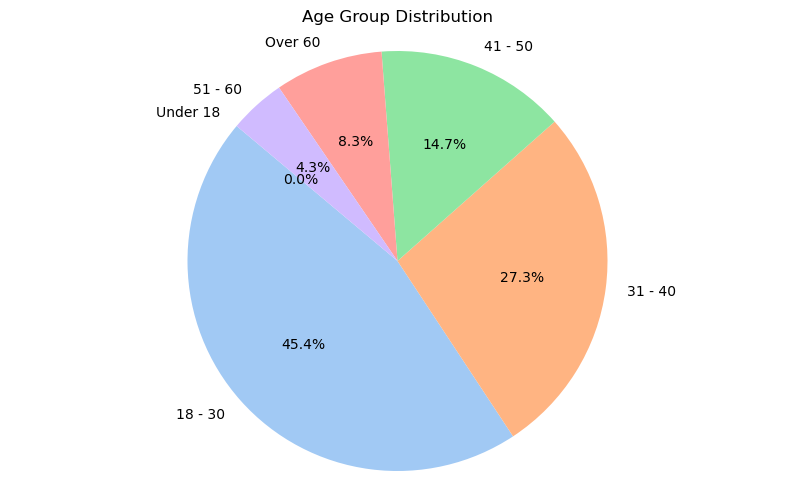

In [112]:
# Calculate the counts for each age group
age_group_counts = df_info['age_group'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

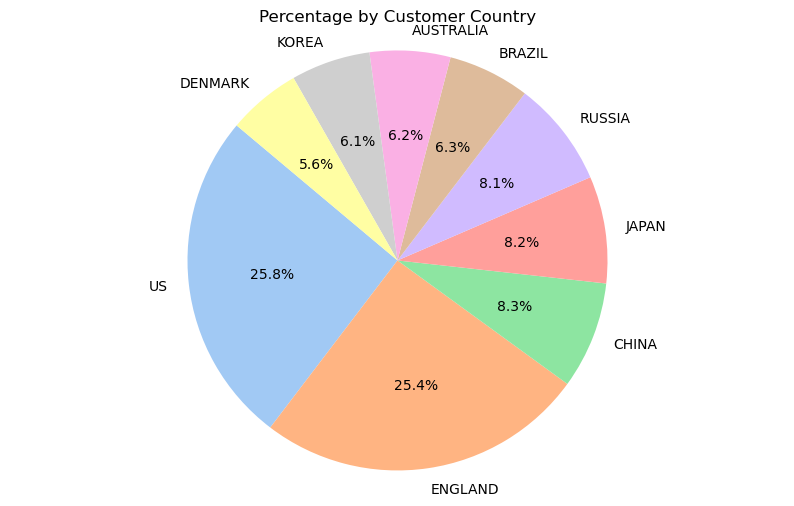

In [113]:
# Calculate the counts for each age group
country_counts = df_info['nation'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Percentage by Customer Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

Customers are mainly concentrated between the ages of 18-40, accounting for more than 70% of the total number of customers, more than 50% coming from English-speaking countries (USA and UK).

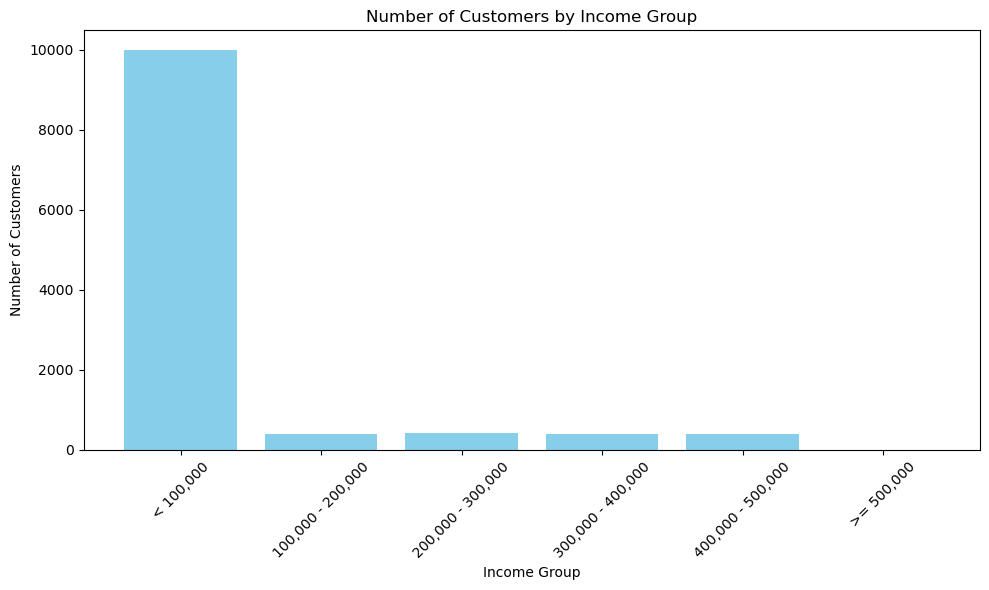

In [114]:
# Count customers by income group
income_counts = df_info['income_group'].value_counts().sort_index()
# Plotting using Matplotlib
plt.figure(figsize=(10, 6))
plt.bar(income_counts.index, income_counts.values, color='skyblue')
plt.title('Number of Customers by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\LE TUAN ANH\AppData\Local\Temp\ipykernel_2696\1799493639.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_data = df_info.groupby('purpose').mean().reset_index()


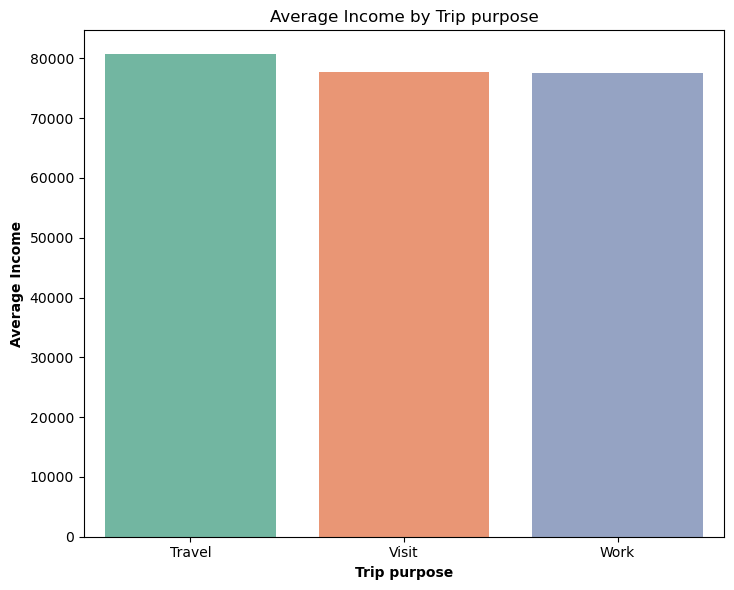

In [115]:
# Aggregate data by Purpose
agg_data = df_info.groupby('purpose').mean().reset_index()
# Set up the figure
plt.figure(figsize=(14, 6))


# Bar plot for Income
plt.subplot(1, 2, 2)
sns.barplot(x='purpose', y='income', data=agg_data, palette='Set2')
plt.xlabel('Trip purpose', fontweight='bold')
plt.ylabel('Average Income', fontweight='bold')
plt.title('Average Income by Trip purpose')

# Show plot
plt.tight_layout()
plt.show()

Customers mainly have an income of less than 100,000 USD, within the common income level of international customers, and may need to use the service at a reasonable price.

International customers who come to travel have a slightly higher income compared to visiting and working.

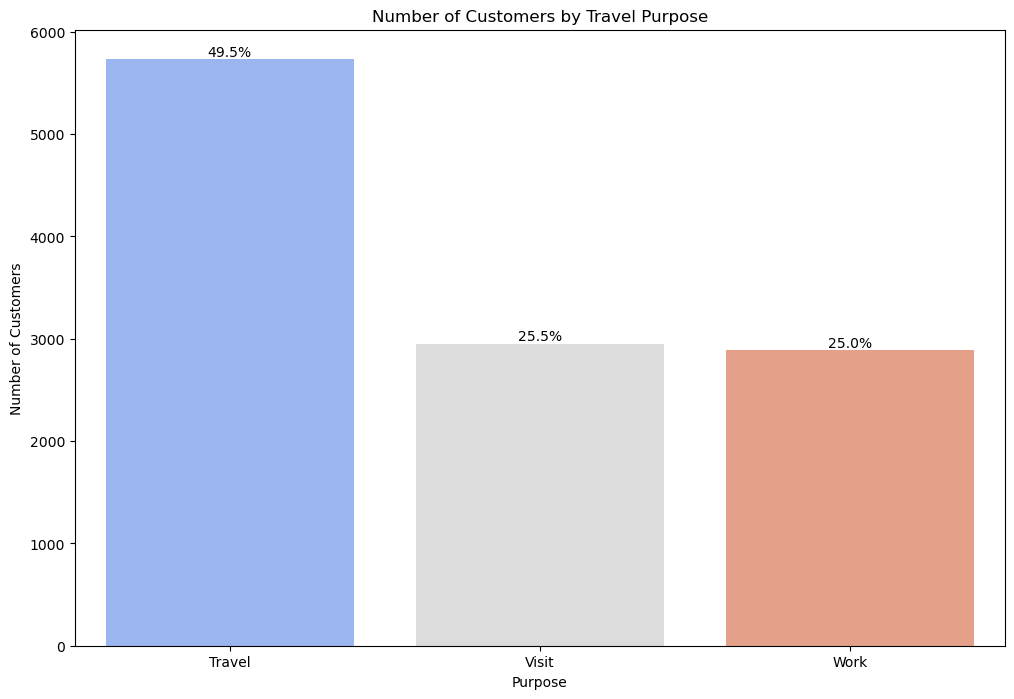

In [116]:
# Group data by 'purpose' to calculate counts
purpose_counts = df_info['purpose'].value_counts().reset_index()
purpose_counts.columns = ['purpose', 'count']

# Calculate percentages
total_customers = purpose_counts['count'].sum()
purpose_counts['percentage'] = (purpose_counts['count'] / total_customers) * 100

# Plotting the bar chart with percentage labels
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=purpose_counts, x='purpose', y='count', palette='coolwarm')

# Add percentage labels on top of each bar
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height() / total_customers * 100)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.title('Number of Customers by Travel Purpose')
plt.xlabel('Purpose')
plt.ylabel('Number of Customers')

plt.show()

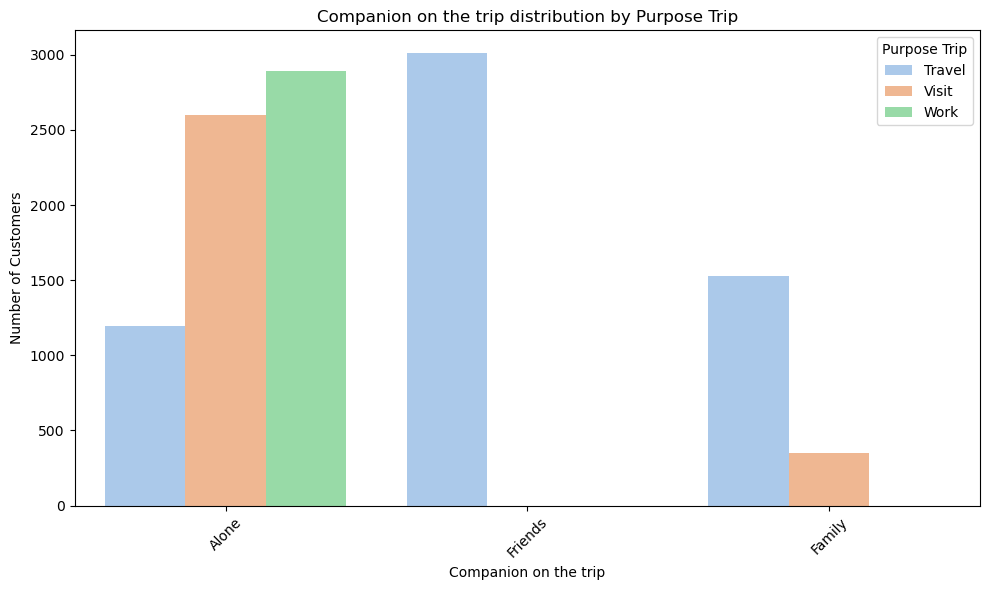

In [117]:
# Create a boxplot

plt.figure(figsize=(10, 6))

sns.countplot(x='go_with', hue='purpose', data=df_info, palette='pastel')

# Add title and label
plt.title('Companion on the trip distribution by Purpose Trip')
plt.xlabel('Companion on the trip')
plt.ylabel('Number of Customers')

# Display the plot
plt.xticks(rotation=45) # Rotate x-axis labels to avoid overlapping
plt.tight_layout() # Make sure no elements are clipped
plt.legend(title='Purpose Trip')
plt.show()

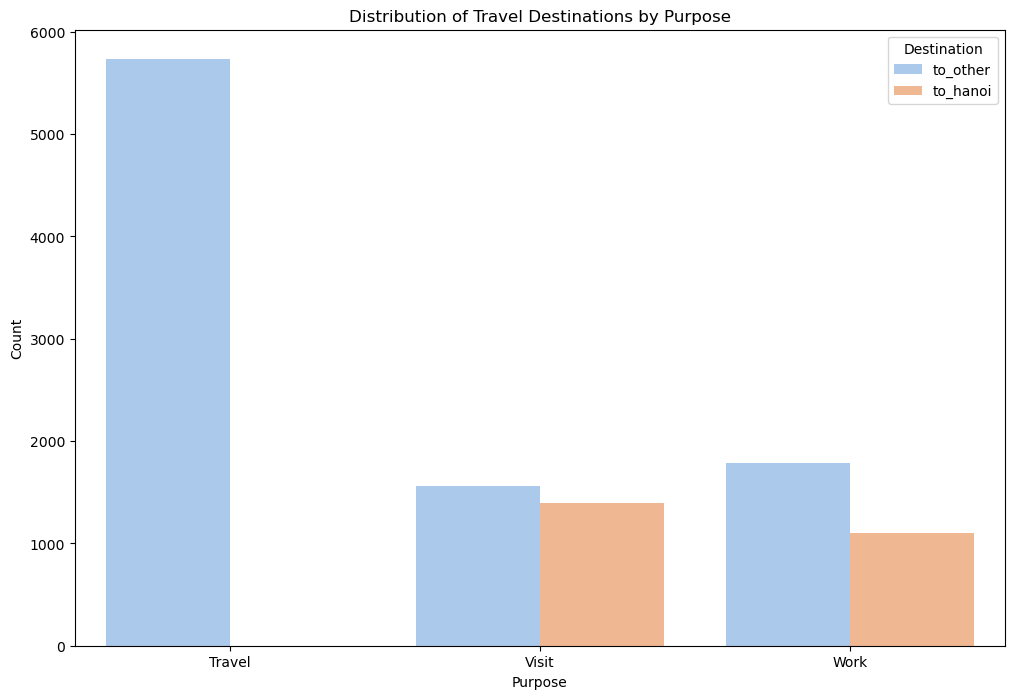

In [118]:
df_counts = df_info.groupby(['purpose', 'to_hanoi']).size().reset_index(name='count')
df_counts['to_hanoi'] = df_counts['to_hanoi'].replace({0: 'to_other', 1: 'to_hanoi'})
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='purpose', y='count', hue='to_hanoi', data=df_counts, palette='pastel')

# Add title and labels
plt.title('Distribution of Travel Destinations by Purpose')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.legend(title='Destination')

# Display the plot
plt.show()

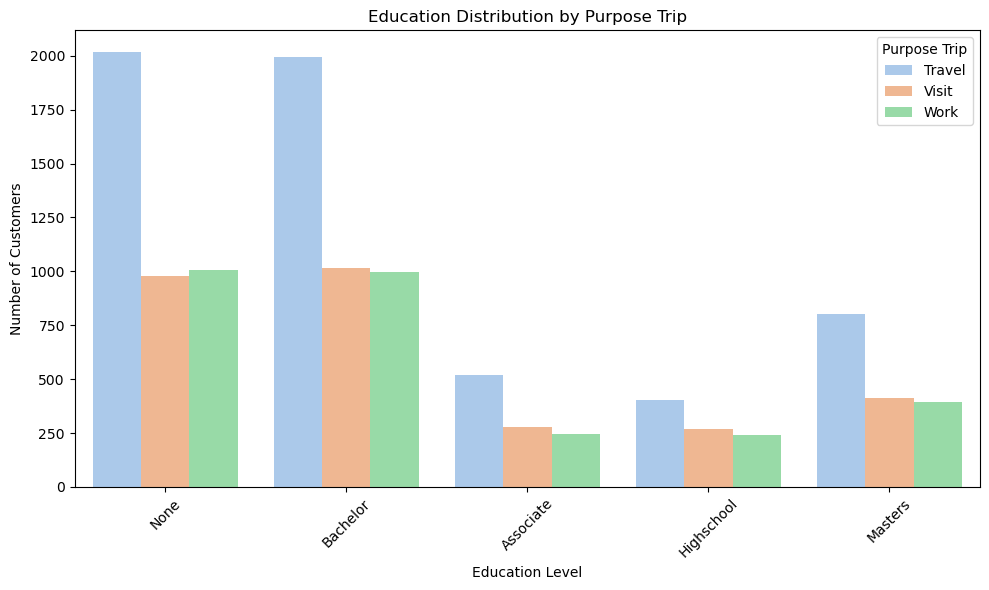

In [119]:
# Create a boxplot

plt.figure(figsize=(10, 6))

sns.countplot(x='education', hue='purpose', data=df_info, palette='pastel')

# Add title and label
plt.title('Education Distribution by Purpose Trip')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

# Display the plot
plt.xticks(rotation=45) # Rotate x-axis labels to avoid overlapping
plt.tight_layout() # Make sure no elements are clipped
plt.legend(title='Purpose Trip')
plt.show()

Most tourists come to Vietnam for tourism purposes and are not influenced by their education level, most of them come with friends and family.

Tourists only go to other provinces and do not go to Hanoi after leaving the airport, especially international tourists traveling with friends will only go on vacation.

The number of people going to work and for short-term visits in Hanoi is higher than other provinces after leaving the airport, mainly solo travelers.

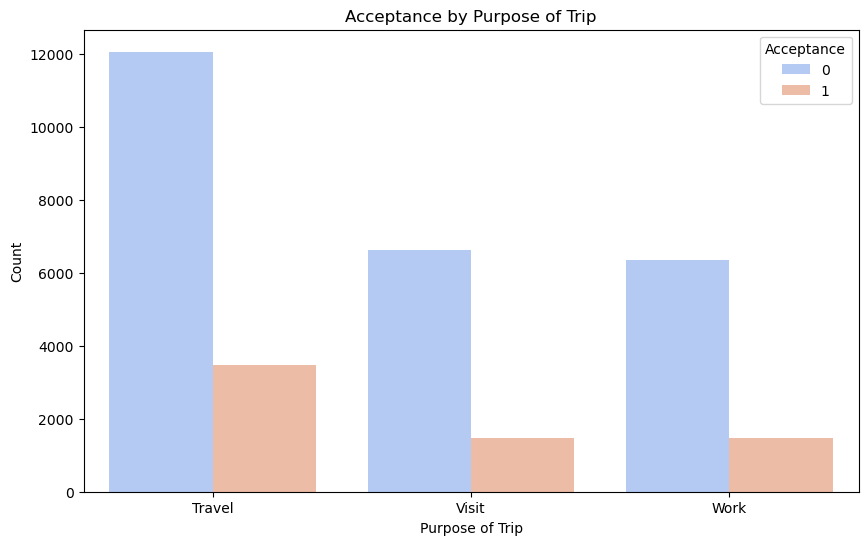

In [120]:
# Create a pivot table to count the number of acceptances and non-acceptances by purpose
pivot_table = df_EDA.groupby(['purpose', 'accept']).size().reset_index(name='count')

# Draw the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x='purpose', y='count', hue='accept', palette='coolwarm')
plt.title('Acceptance by Purpose of Trip')
plt.xlabel('Purpose of Trip')
plt.ylabel('Count')
plt.legend(title='Acceptance', loc='upper right')
plt.show()

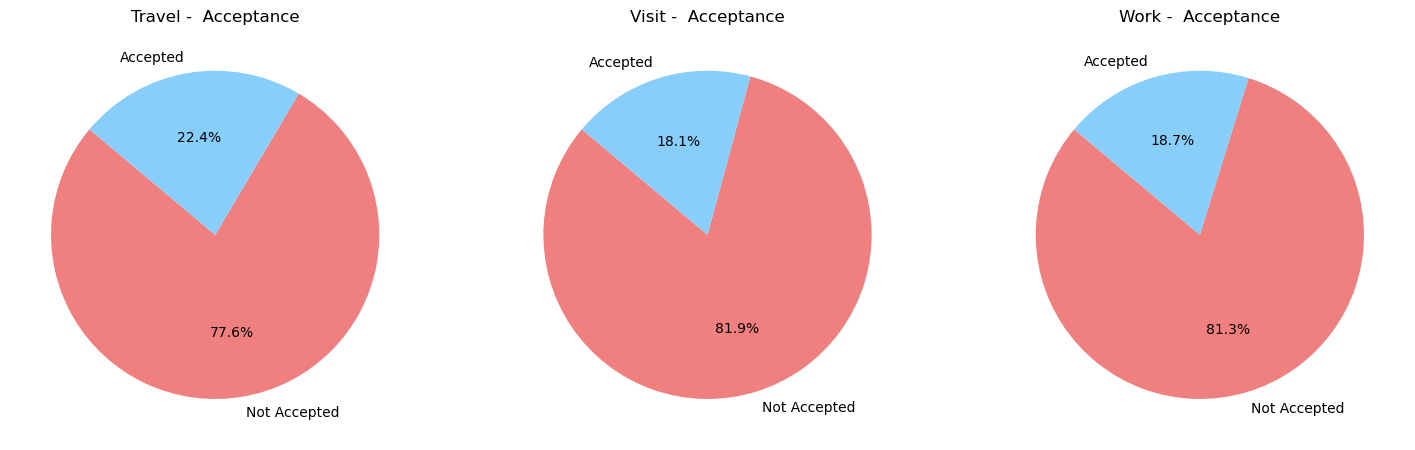

In [121]:
# Group the data by purpose and accept
grouped_data = df_EDA.groupby(['purpose', 'accept']).size().reset_index(name='count')

# Calculate the percentage for each group
grouped_data['percentage'] = grouped_data.groupby('purpose')['count'].transform(lambda x: x / x.sum() * 100)

# Plot pie charts
purposes = grouped_data['purpose'].unique()
fig, axes = plt.subplots(1, len(purposes), figsize=(18, 6))

for i, purpose in enumerate(purposes):
    data = grouped_data[grouped_data['purpose'] == purpose]
    axes[i].pie(data['percentage'], labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
    axes[i].set_title(f'{purpose} -  Acceptance')

plt.show()

The package registration rate of customers traveling for tourism is highest compared to customers visiting for short periods of time and working.

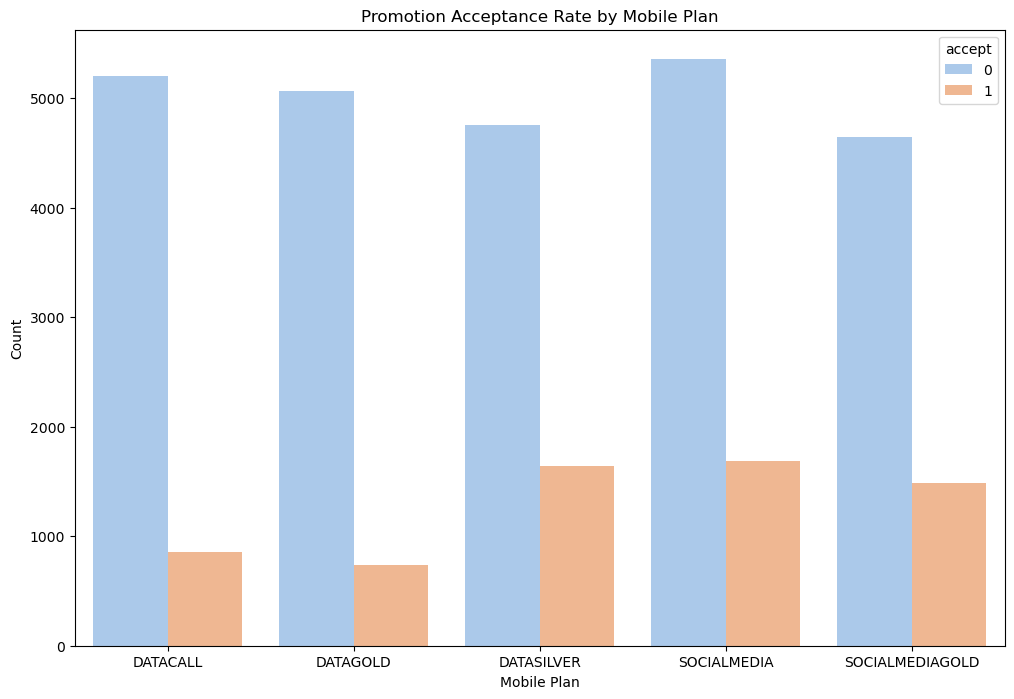

In [122]:
# Group data by 'mobile_plan' and 'accept' to calculate counts
pivot_table = df_EDA.groupby(['mobile_plan', 'accept']).size().reset_index(name='count')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_table, x='mobile_plan', y='count', hue='accept', palette='pastel')
plt.title('Promotion Acceptance Rate by Mobile Plan')
plt.xlabel('Mobile Plan')
plt.ylabel('Count')

plt.show()

Data silver, social media and social media gold packages are the most registered and used

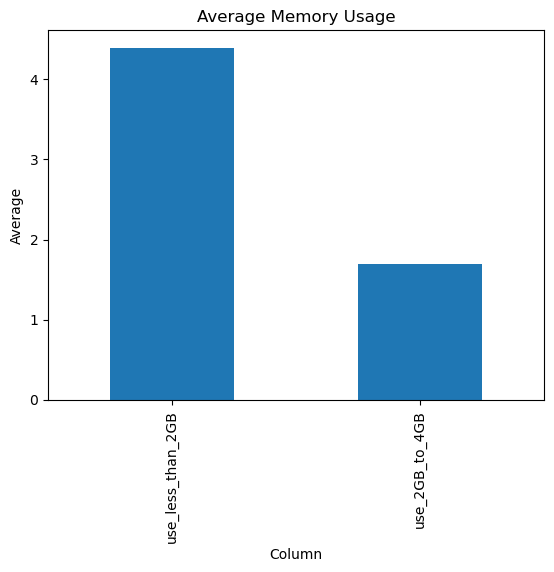

In [123]:
# Calculate the mean of the two columns
df_mean = df[["use_less_than_2GB", "use_2GB_to_4GB"]].mean()

# Create a bar chart
df_mean.plot(kind="bar")
plt.xlabel("Column")
plt.ylabel("Average")
plt.title("Average Memory Usage")
plt.show()

In a month, customers have an average number of days consuming less than 2GB/day than the average number of days consuming 4GB/day

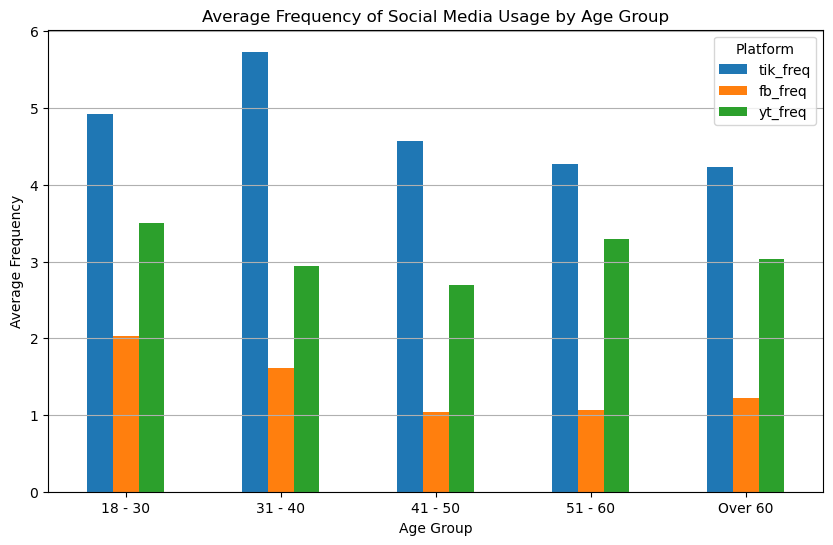

In [124]:
# Group by age_group and calculate mean frequencies
mean_freq = df_info[['tik_freq','fb_freq','yt_freq','age_group']].groupby('age_group').mean().dropna()
mean_freq
# Plotting
mean_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Average Frequency of Social Media Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()

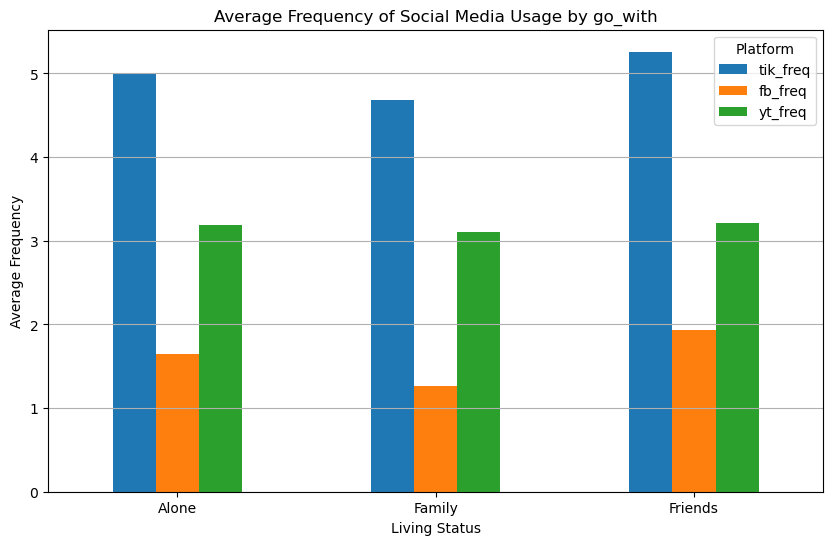

In [125]:
# Group by age_group and calculate mean frequencies
going_freq = df_info[['tik_freq','fb_freq','yt_freq','go_with']].groupby('go_with').mean().dropna()
going_freq
# Plotting
going_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Average Frequency of Social Media Usage by go_with')
plt.xlabel('Living Status')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()

The frequency of using social networks among customers aged 18-40 is highest, in which the frequency of using tiktok among the 31-40 year old group is much higher than the 18-30 year old group.

The frequency of using social networks among customers traveling alone is double that of customers traveling with friends and 3 times higher than that of customers traveling with their families.


Tourists are more likely to accept package subscriptions than short-term and working visitors.

 The most popular data packages are suitable for the needs of key customers aged 18-40 years old, who travel a lot and use social networks a lot, with high frequency during the day, common income levels, and low income levels. Data usage is usually less than 2gb/day.
 
 Customers traveling with friends will often use social networks to post photos or interact with the online community

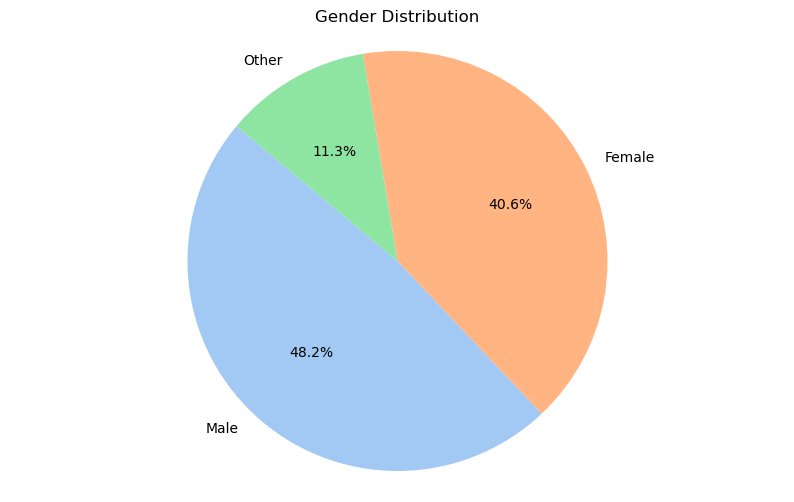

In [126]:
# Calculate the counts of each gender
gender_counts = df_info['gender'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(10, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Gender Distribution')
plt.axis('equal')  # Ensure the pie chart is drawn as a circle

# Display the plot
plt.show()

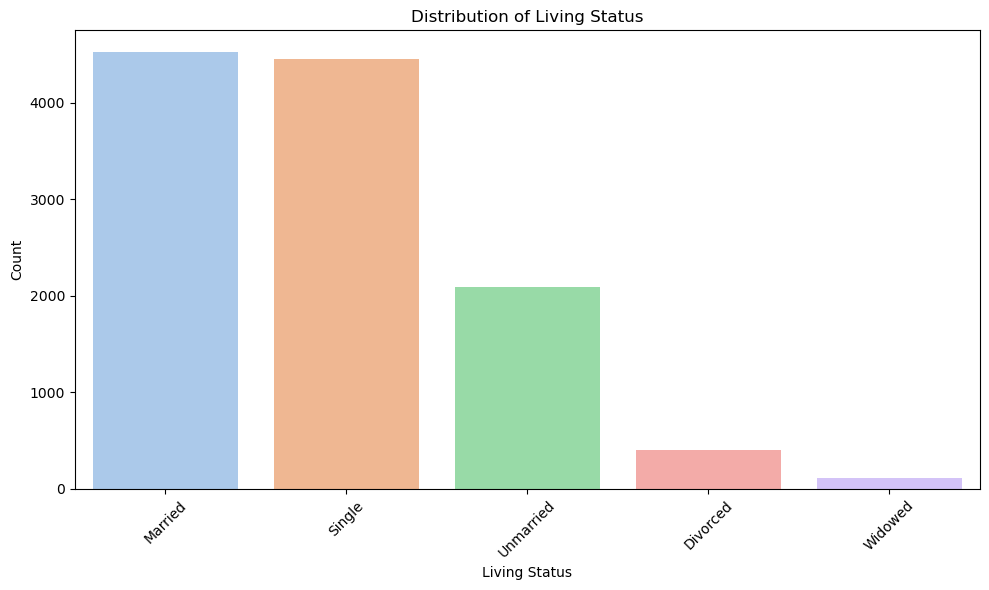

In [127]:
# Calculate counts of each living status
living_status_counts = df_info['living_status'].value_counts()

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=living_status_counts.index, y=living_status_counts.values, palette='pastel')
plt.title('Distribution of Living Status')
plt.xlabel('Living Status')
plt.ylabel('Count')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

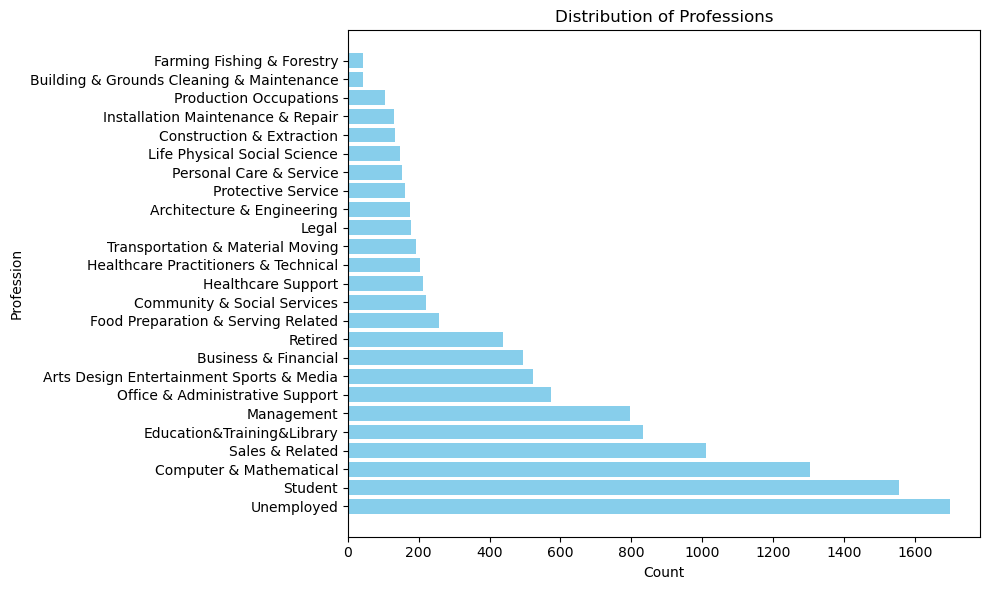

In [128]:
# Calculate counts of each profession
profession_counts = df_info['profession'].value_counts()

# Plotting the horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(profession_counts.index, profession_counts.values, color='skyblue')
plt.title('Distribution of Professions')
plt.xlabel('Count')
plt.ylabel('Profession')

# Display the plot
plt.tight_layout()
plt.show()

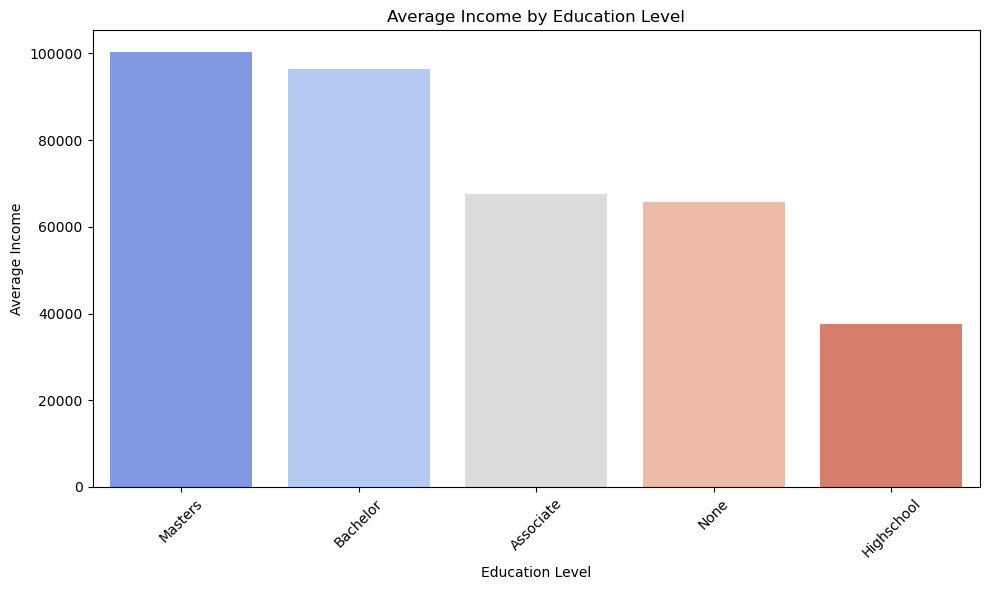

In [129]:
# Calculate average income by education
avg_income_education = df_info.groupby('education')['income'].mean().sort_values(ascending=False)
# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_income_education.index, y=avg_income_education.values, palette='coolwarm')
plt.title('Average Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

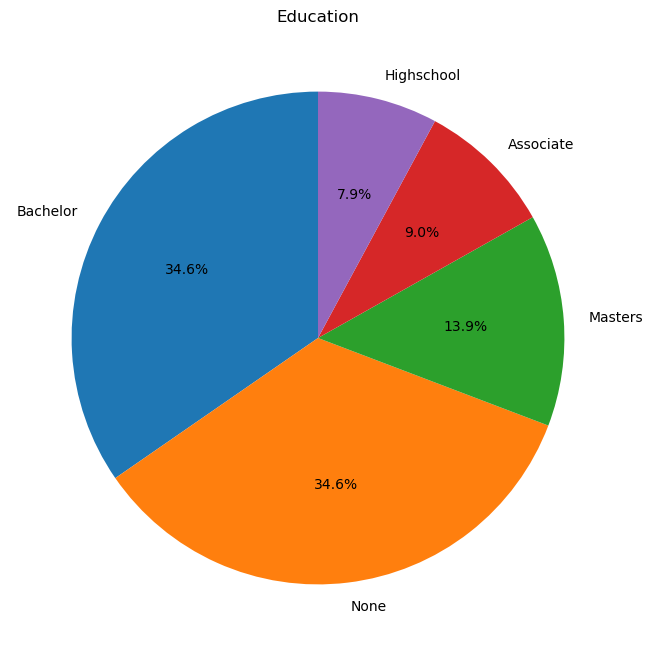

In [130]:
# Calculate value counts of 'education'
education_counts = df_info['education'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Education')
plt.show()

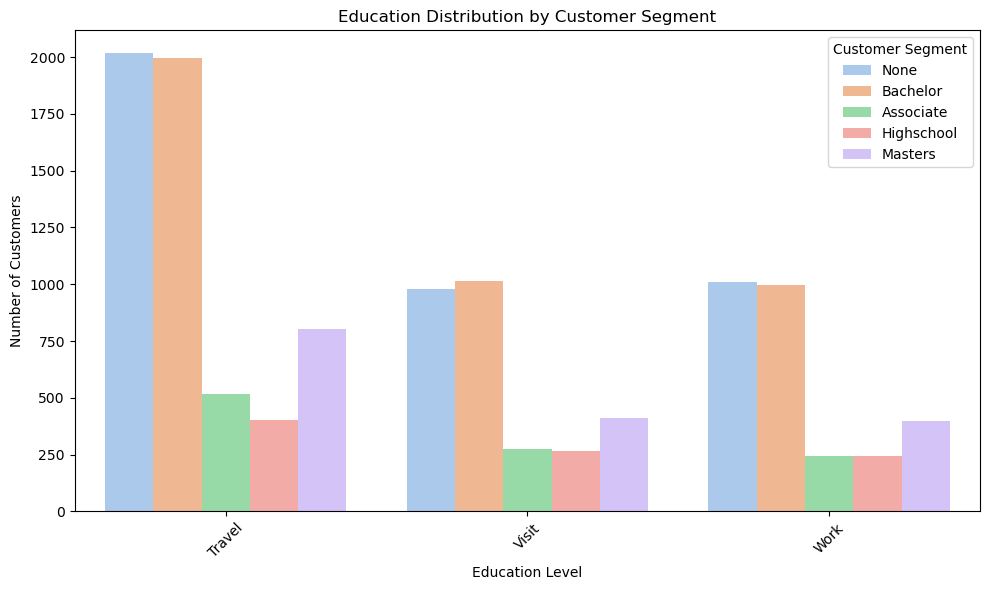

In [131]:
# Create a boxplot

plt.figure(figsize=(10, 6))

sns.countplot(x='purpose', hue='education', data=df_info, palette='pastel')

# Add title and label
plt.title('Education Distribution by Customer Segment')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')

# Display the plot
plt.xticks(rotation=45) # Rotate x-axis labels to avoid overlapping
plt.tight_layout() # Make sure no elements are clipped
plt.legend(title='Customer Segment')
plt.show()

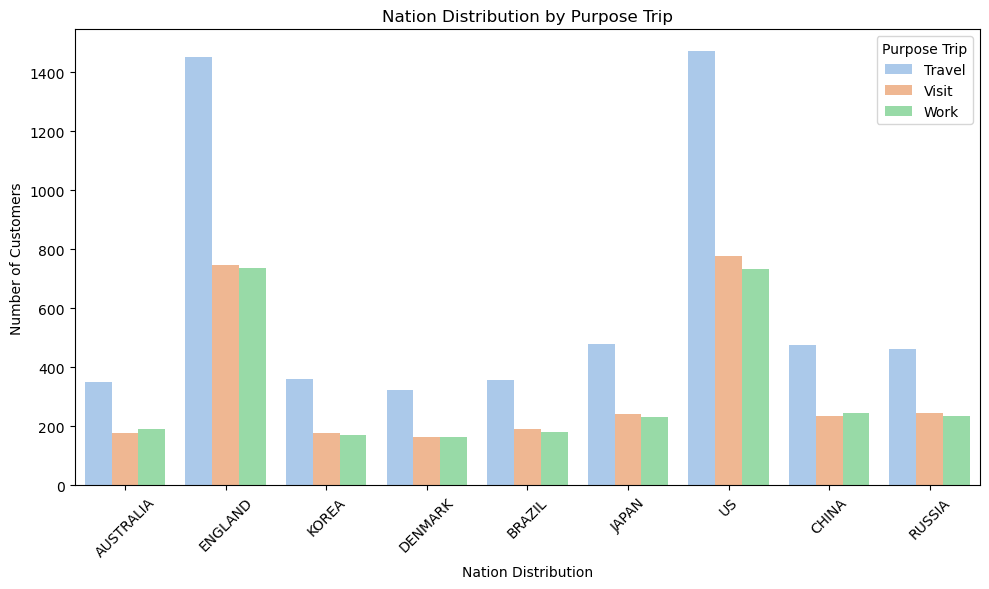

In [132]:
# Create a boxplot

plt.figure(figsize=(10, 6))

sns.countplot(x='nation', hue='purpose', data=df_info, palette='pastel')

# Add title and label
plt.title('Nation Distribution by Purpose Trip')
plt.xlabel('Nation Distribution')
plt.ylabel('Number of Customers')

# Display the plot
plt.xticks(rotation=45) # Rotate x-axis labels to avoid overlapping
plt.tight_layout() # Make sure no elements are clipped
plt.legend(title='Purpose Trip')
plt.show()

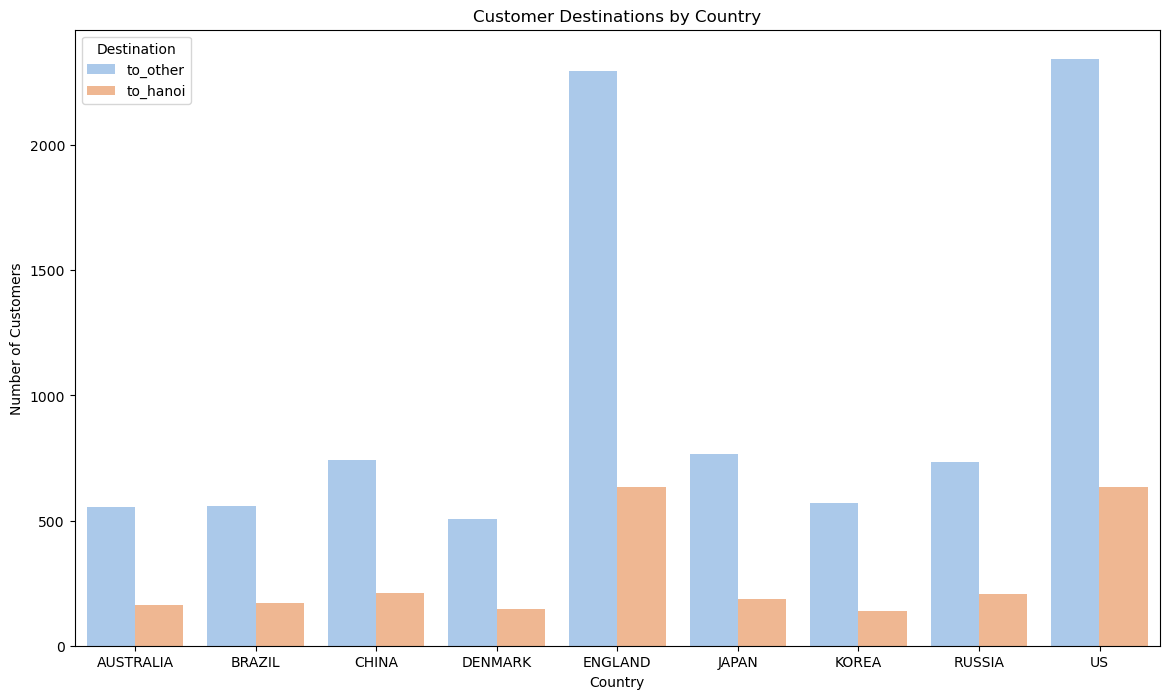

In [133]:
# Group by 'nation' và 'destination' để tính toán số lượng
nation_counts = df_info.groupby(['nation', 'to_hanoi']).size().reset_index(name='count')
nation_counts['to_hanoi'] = nation_counts['to_hanoi'].replace({0: 'to_other', 1: 'to_hanoi'})
# Vẽ biểu đồ
plt.figure(figsize=(14, 8))
sns.barplot(data=nation_counts, x='nation', y='count', hue='to_hanoi', palette='pastel')
plt.title('Customer Destinations by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.legend(title='Destination')

# Hiển thị biểu đồ
plt.show()

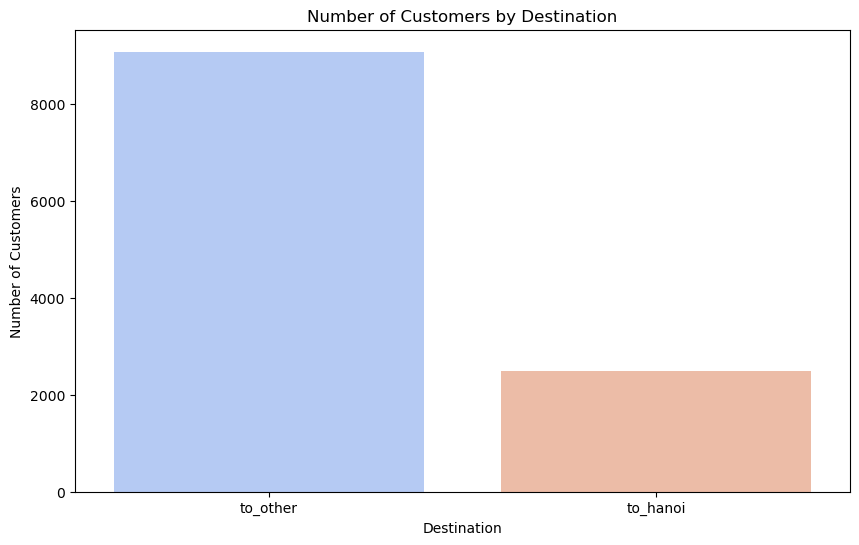

In [134]:

destination_counts = df_info['to_hanoi'].value_counts().reset_index()
destination_counts.columns = ['to_hanoi', 'count']
destination_counts['to_hanoi'] = destination_counts['to_hanoi'].replace({0: 'to_other', 1: 'to_hanoi'})
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(data=destination_counts, x='to_hanoi', y='count', palette='coolwarm')
plt.title('Number of Customers by Destination')
plt.xlabel('Destination')
plt.ylabel('Number of Customers')

plt.show()

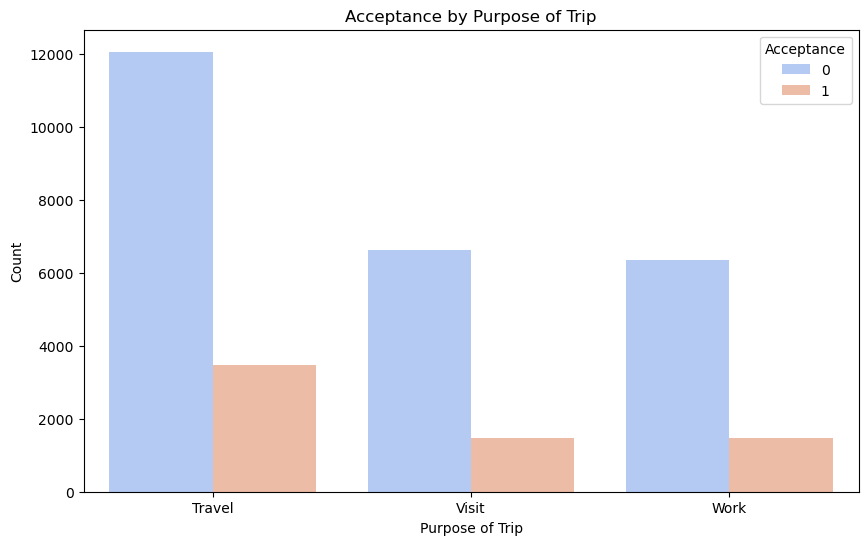

In [135]:
# Create a pivot table to count the number of acceptances and non-acceptances by purpose
pivot_table = df_EDA.groupby(['purpose', 'accept']).size().reset_index(name='count')

# Draw the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=pivot_table, x='purpose', y='count', hue='accept', palette='coolwarm')
plt.title('Acceptance by Purpose of Trip')
plt.xlabel('Purpose of Trip')
plt.ylabel('Count')
plt.legend(title='Acceptance', loc='upper right')
plt.show()

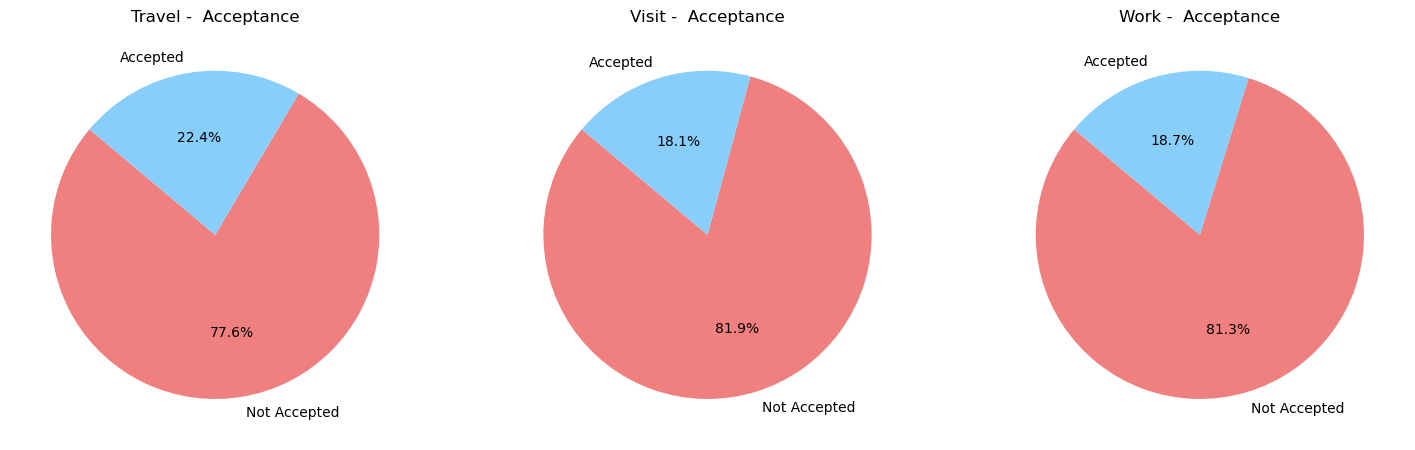

In [136]:
# Group the data by purpose and accept
grouped_data = df_EDA.groupby(['purpose', 'accept']).size().reset_index(name='count')

# Calculate the percentage for each group
grouped_data['percentage'] = grouped_data.groupby('purpose')['count'].transform(lambda x: x / x.sum() * 100)

# Plot pie charts
purposes = grouped_data['purpose'].unique()
fig, axes = plt.subplots(1, len(purposes), figsize=(18, 6))

for i, purpose in enumerate(purposes):
    data = grouped_data[grouped_data['purpose'] == purpose]
    axes[i].pie(data['percentage'], labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
    axes[i].set_title(f'{purpose} -  Acceptance')

plt.show()

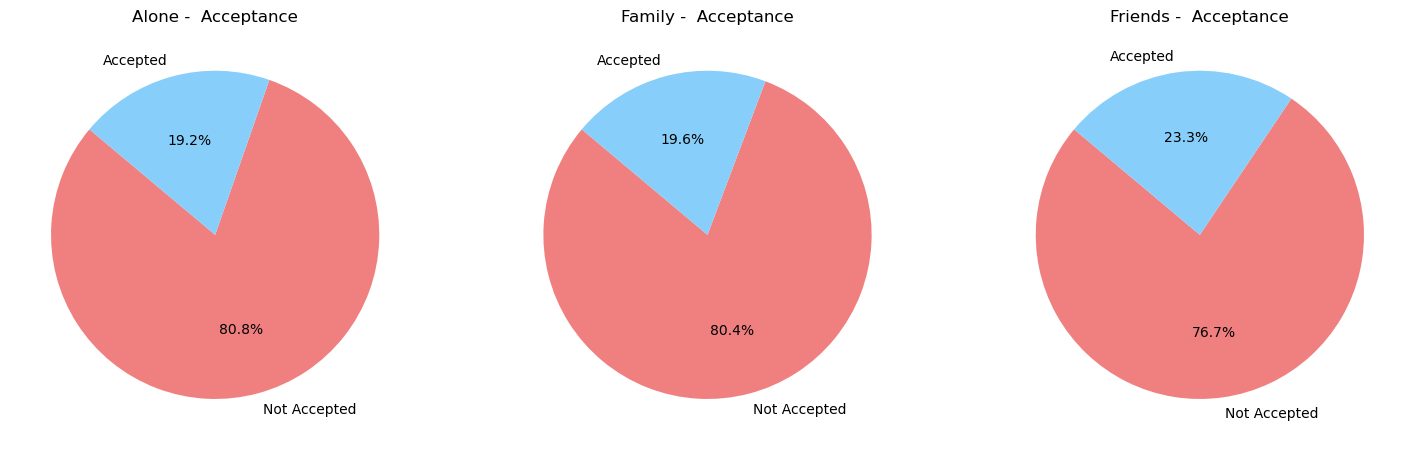

In [137]:
# Group the data by purpose and accept
grouped_data = df_EDA.groupby(['go_with', 'accept']).size().reset_index(name='count')

# Calculate the percentage for each group
grouped_data['percentage'] = grouped_data.groupby('go_with')['count'].transform(lambda x: x / x.sum() * 100)

# Plot pie charts
purposes = grouped_data['go_with'].unique()
fig, axes = plt.subplots(1, len(purposes), figsize=(18, 6))

for i, purpose in enumerate(purposes):
    data = grouped_data[grouped_data['go_with'] == purpose]
    axes[i].pie(data['percentage'], labels=['Not Accepted', 'Accepted'], autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
    axes[i].set_title(f'{purpose} -  Acceptance')

plt.show()

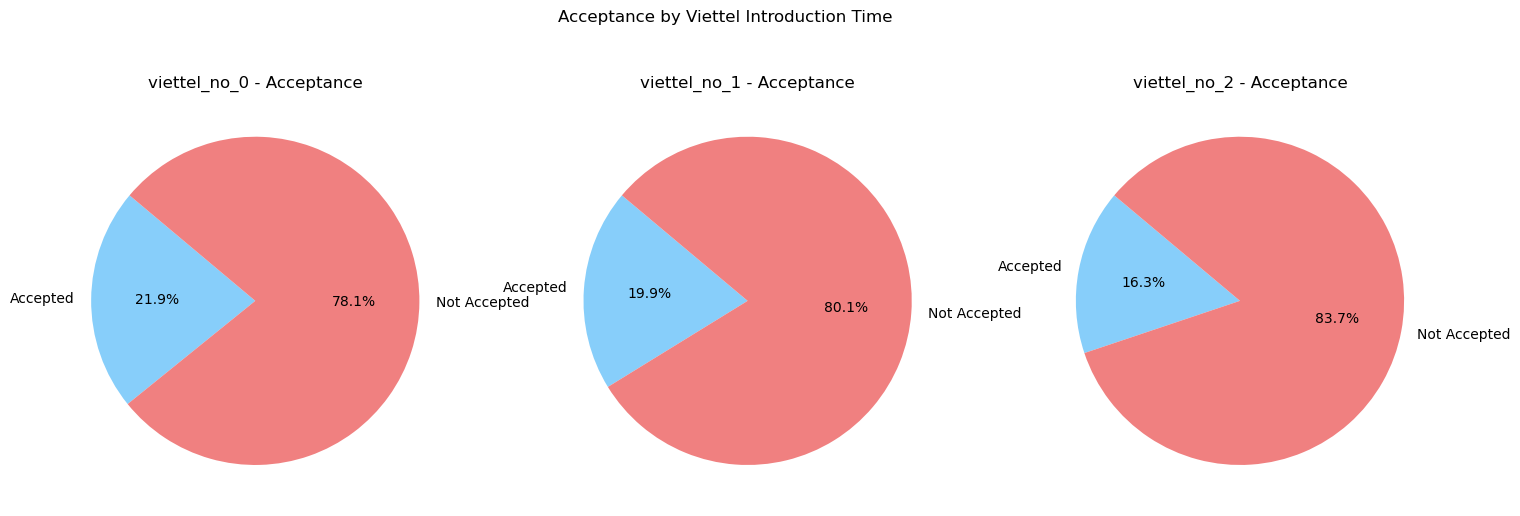

In [138]:

def plot_pie_chart(data, variable, ax):
    if variable == 'viettel_no_0':
        total_count = data[(data['viettel_no_0'] == 1) & 
                           (data['viettel_no_1'] == 0) & 
                           (data['viettel_no_2'] == 0)].shape[0]
        acceptance_count = data[(data['viettel_no_0'] == 1) & 
                                (data['viettel_no_1'] == 0) & 
                                (data['viettel_no_2'] == 0) & 
                                (data['accept'] == 1)].shape[0]
    elif variable == 'viettel_no_1':
        total_count = data[(data['viettel_no_0'] == 1) & 
                           (data['viettel_no_1'] == 1) & 
                           (data['viettel_no_2'] == 0)].shape[0]
        acceptance_count = data[(data['viettel_no_0'] == 1) & 
                                (data['viettel_no_1'] == 1) & 
                                (data['viettel_no_2'] == 0) & 
                                (data['accept'] == 1)].shape[0]
    elif variable == 'viettel_no_2':
        total_count = data[(data['viettel_no_0'] == 1) & 
                           (data['viettel_no_1'] == 1) & 
                           (data['viettel_no_2'] == 1)].shape[0]
        acceptance_count = data[(data['viettel_no_0'] == 1) & 
                                (data['viettel_no_1'] == 1) & 
                                (data['viettel_no_2'] == 1) & 
                                (data['accept'] == 1)].shape[0]
    else:
        return  # Handle other cases if needed
    
    rejection_count = total_count - acceptance_count
    
    acceptance_percentage = (acceptance_count / total_count) * 100 if total_count > 0 else 0
    rejection_percentage = (rejection_count / total_count) * 100 if total_count > 0 else 0
    
    labels = ['Accepted', 'Not Accepted']
    sizes = [acceptance_percentage, rejection_percentage]
    colors = ['lightskyblue', 'lightcoral']
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'{variable} - Acceptance')

# Create subplots for each pie chart
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of variables to plot
variables = ['viettel_no_0', 'viettel_no_1', 'viettel_no_2']

# Plot each pie chart
for i, var in enumerate(variables):
    plot_pie_chart(df_EDA, var, axes[i])

plt.suptitle('Acceptance by Viettel Introduction Time')
plt.show()

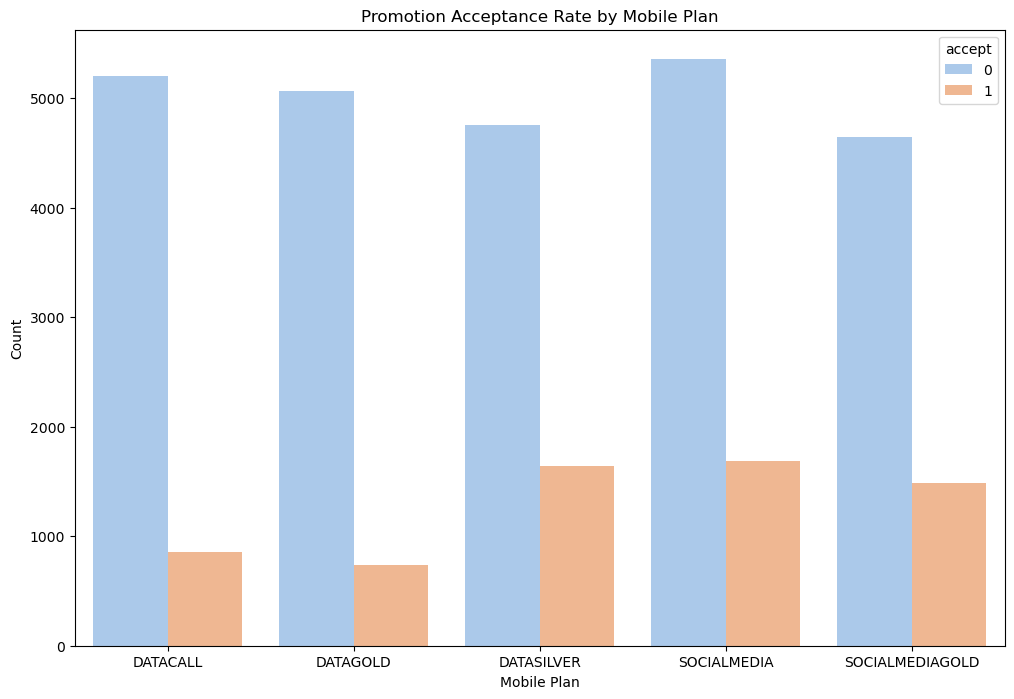

In [139]:
# Group data by 'mobile_plan' and 'accept' to calculate counts
pivot_table = df_EDA.groupby(['mobile_plan', 'accept']).size().reset_index(name='count')

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=pivot_table, x='mobile_plan', y='count', hue='accept', palette='pastel')
plt.title('Promotion Acceptance Rate by Mobile Plan')
plt.xlabel('Mobile Plan')
plt.ylabel('Count')

plt.show()

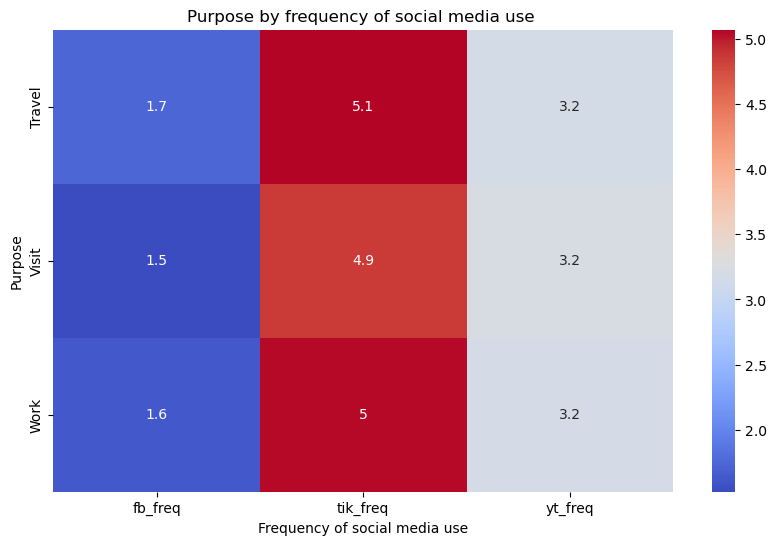

In [140]:
# Create a pivot table
pivot_table = df_info.pivot_table(index='purpose', values=['fb_freq', 'yt_freq', 'tik_freq'], aggfunc='mean')

# Draw a rectangular chart
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Purpose by frequency of social media use ')
plt.xlabel('Frequency of social media use')
plt.ylabel('Purpose')
plt.show()

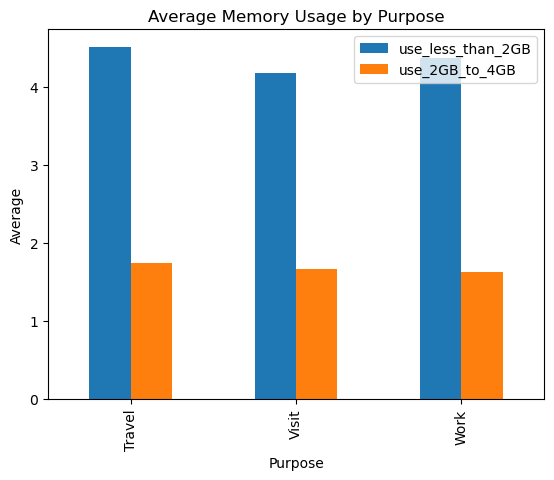

In [141]:
# Calculate the mean by purpose
df_mean = df.groupby('purpose')[["use_less_than_2GB", "use_2GB_to_4GB"]].mean()

# Create a bar chart
df_mean.plot(kind="bar")
plt.xlabel("Purpose")
plt.ylabel("Average")
plt.title("Average Memory Usage by Purpose")
plt.show()

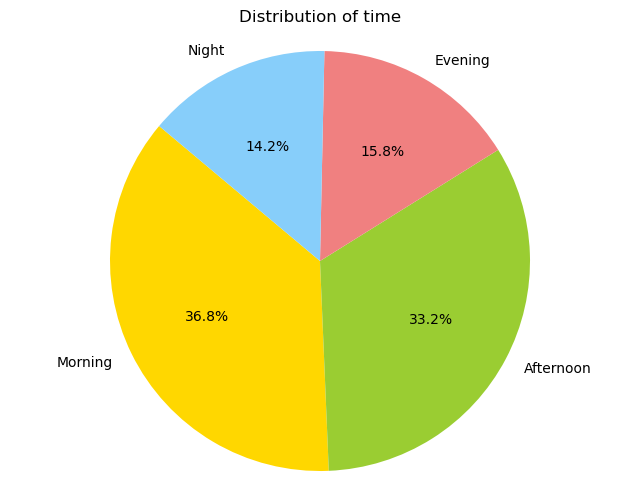

In [142]:

time_bin_counts = df_info['time_bin'].value_counts()
labels = time_bin_counts.index
sizes = time_bin_counts.values
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of time')
plt.axis('equal') 
plt.show()

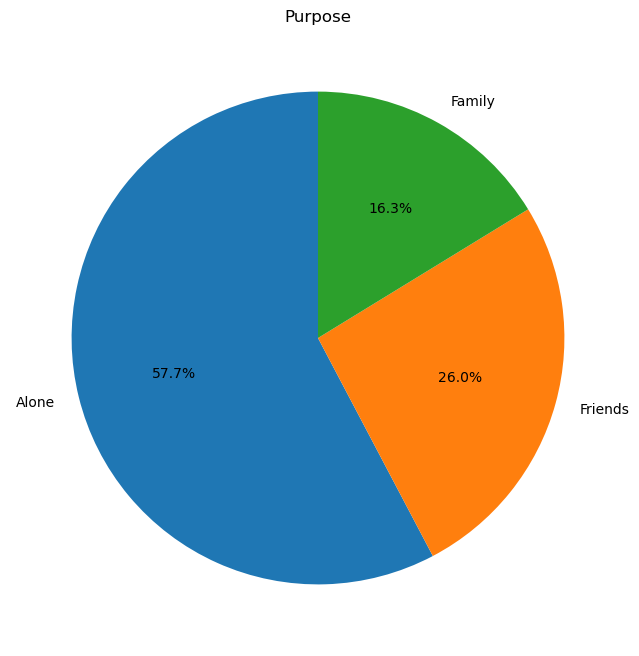

In [143]:
# Calculate value counts of 'education'
go_with_counts = df_info['go_with'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(go_with_counts, labels=go_with_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Purpose')
plt.show()

Text(0.5, 1.0, 'Distribution of Accept')

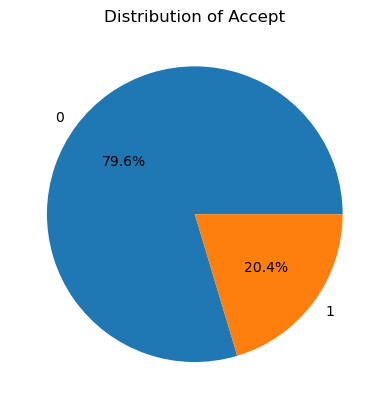

In [144]:
fig,axes = plt.subplots(1,1)
axes.pie(df_normalize.accept.value_counts(), labels= df_normalize.accept.value_counts().index, autopct='%1.1f%%')
axes.set_title("Distribution of Accept")

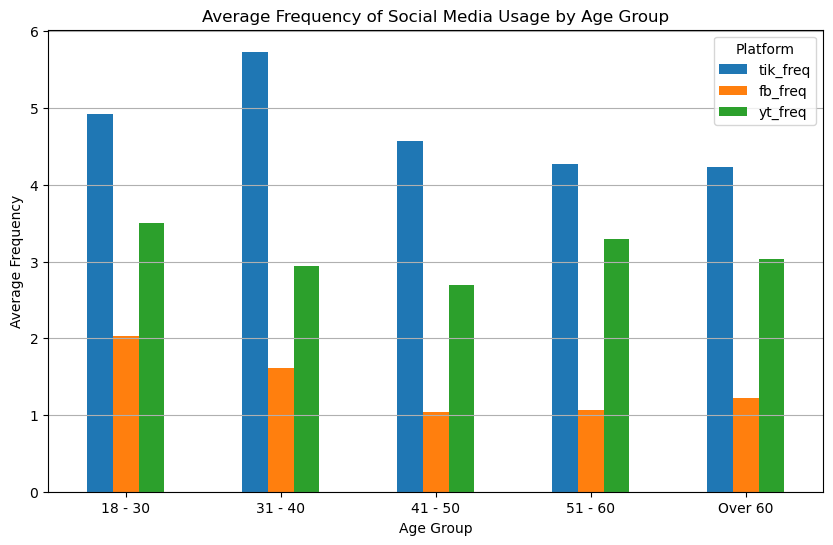

In [145]:
# Group by age_group and calculate mean frequencies
mean_freq = df_info[['tik_freq','fb_freq','yt_freq','age_group']].groupby('age_group').mean().dropna()
mean_freq
# Plotting
mean_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Average Frequency of Social Media Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()

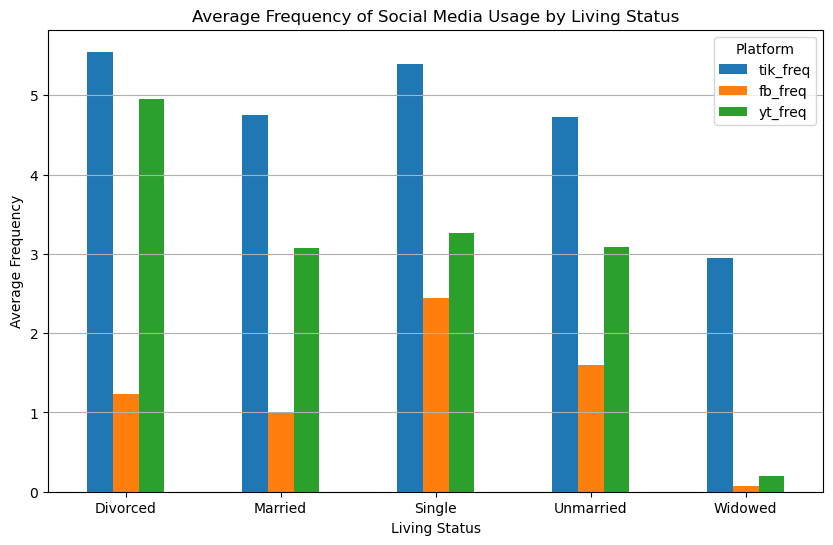

In [146]:
# Group by age_group and calculate mean frequencies
living_freq = df_info[['tik_freq','fb_freq','yt_freq','living_status']].groupby('living_status').mean().dropna()
living_freq
# Plotting
living_freq.plot(kind='bar', figsize=(10, 6))
plt.title('Average Frequency of Social Media Usage by Living Status')
plt.xlabel('Living Status')
plt.ylabel('Average Frequency')
plt.xticks(rotation=0)
plt.legend(title='Platform')
plt.grid(axis='y')
plt.show()

# PART 4: CLASSIFICATION

##  MODEL 1: CLASSIFICATION WITH ACCEPTANCE

### 1.Create Model

In [147]:
import numpy as np
import pandas as pd

import xgboost
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

import matplotlib.pyplot as plt

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, balanced_accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [149]:
df_train = df_normalize.copy().drop(['name','job','id','phone','description','duration','price','viettel_no_0','profession','age_group','time_bin','income_group','living_with_index'],axis = 1)

In [150]:
df_train.T

,0,1,2,3,4,5,6,7,8,9,...,31420,31421,31422,31423,31424,31425,31426,31427,31428,31429
purpose,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,Travel,...,Visit,Work,Work,Work,Work,Work,Work,Work,Work,Work
go_with,Alone,Alone,Friends,Friends,Friends,Friends,Friends,Friends,Friends,Friends,...,Family,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Sunny,Snowy,Snowy,Snowy,Snowy,Sunny,Sunny,Sunny,Sunny,Sunny
time,13:00,13:00,09:00,09:00,09:00,15:00,15:00,15:00,14:00,14:00,...,20:00,06:00,06:00,07:00,07:00,07:00,07:00,07:00,07:00,07:00
viettel_no_1,0,0,1,1,1,1,1,1,1,1,...,1,0,0,1,1,0,0,0,0,0
viettel_no_2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
to_hanoi,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,1,1,1
score,0,0,0,0,0,0,0,0,30,30,...,0,13,13,0,0,0,0,0,0,0
gender,Female,Female,Other,Other,Other,Female,Female,Female,Female,Female,...,Male,Male,Male,Male,Male,Male,Male,Male,Male,Male
age,21,21,22,22,22,24,24,24,24,24,...,26,30,30,30,30,27,27,27,27,27


In [151]:
df_test = df_normalize_test.copy().drop(['name','job','id','phone','description','duration','price','viettel_no_0','profession','living_with_index'],axis = 1)

In [152]:
df_test.T

,0,1,2,3,4,5,6,7,8,9,...,1102,1103,1104,1105,1106,1107,1108,1109,1110,1111
purpose,Travel,Travel,Travel,Travel,Visit,Work,Work,Travel,Work,Travel,...,Travel,Visit,Visit,Travel,Travel,Travel,Visit,Travel,Visit,Work
go_with,Alone,Friends,Family,Family,Alone,Alone,Alone,Friends,Alone,Friends,...,Alone,Alone,Alone,Friends,Friends,Friends,Alone,Alone,Family,Alone
weather,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,Sunny,...,Rainy,Snowy,Snowy,Sunny,Sunny,Snowy,Rainy,Rainy,Sunny,Rainy
time,14:00,13:00,09:00,12:00,17:00,06:00,07:00,12:00,07:00,18:00,...,09:00,19:00,22:00,17:00,10:00,00:00,19:00,08:00,20:00,06:00
viettel_no_1,0,1,1,0,0,1,0,1,1,1,...,1,1,1,0,0,0,0,1,1,0
viettel_no_2,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
to_hanoi,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
score,5,4,0,0,3,0,0,0,0,0,...,0,15,0,0,0,20,27,0,7,0
gender,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Female
age,33,34,34,34,34,33,35,44,43,33,...,34,35,31,36,38,37,40,54,72,61


In [153]:
categories = ['education', 'gender', 'go_with', 'living_status', 'nation', 'purpose', 'time', 'weather','mobile_plan']

In [154]:
for col in categories:
    df_train[col] = df_train[col].astype('category')
    label_encoders = {}
    for col in categories:
        le = LabelEncoder()
        df_train[col] = le.fit_transform(df_train[col])
        label_encoders[col] = le

In [155]:
for col in categories:
    df_test[col] = df_test[col].astype('category')
    label_encoders = {}
    for col in categories:
        le = LabelEncoder()
        df_test[col] = le.fit_transform(df_test[col])
        label_encoders[col] = le

In [156]:
var_columns = [x for x in df_train.columns if x not in ['accept']]

In [157]:
X = df_train.loc[:, var_columns]
y = df_train.loc[:, 'accept']

In [158]:
X_test = df_train.loc[:, var_columns]
y_test = df_train.loc[:, 'accept']

In [159]:
from sklearn.feature_selection import SelectKBest,f_classif
# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)
scores = selector.scores_

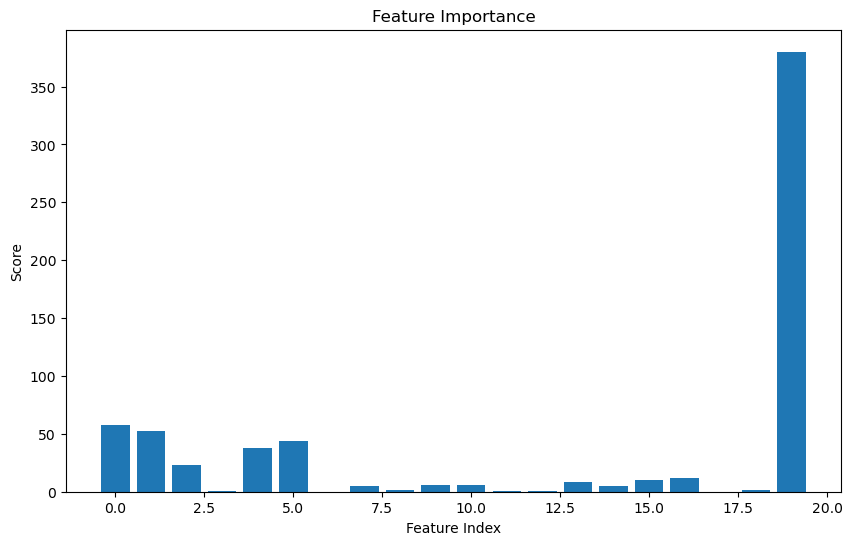

In [160]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), scores)
plt.xlabel('Feature Index')
plt.ylabel('Score')
plt.title('Feature Importance')
plt.show()

In [161]:
# Select top k features
k = 16
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)
X_test_new = selector.fit_transform(X, y)

In [162]:
from imblearn.over_sampling import SVMSMOTE

smote = SVMSMOTE(random_state=42)


X_res, y_res = smote.fit_resample(X_new, y)


In [163]:
# Split data for initial train/test
X_train, X_valid, y_train, y_valid = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

In [164]:
# Define model and parameters for GridSearchCV
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [165]:
from sklearn.model_selection import StratifiedKFold
# K-fold validation
cv = StratifiedKFold(n_splits=5)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [165]:
model_rf_fin = grid_search.best_estimator_

In [166]:
# Evaluate the model
y_pred = model_rf_fin.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
balanced_accuracy = balanced_accuracy_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)

In [167]:
from sklearn.metrics import classification_report
# Print the classification report
print("Classification Report:")
print(classification_report(y_valid, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5077
           1       0.98      0.76      0.85      4935

    accuracy                           0.87     10012
   macro avg       0.89      0.87      0.87     10012
weighted avg       0.89      0.87      0.87     10012



The precision, recall, f1_score indexes are high between classes and the Accuracy index = 87% shows that the model predicts the results quite well.

In [168]:
from sklearn.model_selection import learning_curve
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(model_rf_fin, X_res, y_res, cv=cv, scoring='f1', n_jobs=-1)

In [169]:
# Calculate the mean and standard deviation for plotting
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

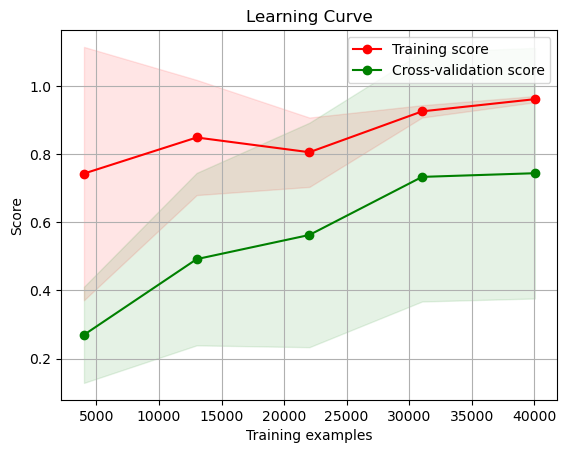

In [170]:
# Plot learning curve
plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.grid()

# Plot the mean and fill the standard deviation
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

# Plot the mean scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

The difference between Training Score and Cross_validation Score is not too large at training data size of 25000 - 30000 with high Score.

=> The phenomenon of overfitting and underfitting is low.

In [171]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Balanced Accuracy: {balanced_accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")

Accuracy: 0.8723
F1 Score: 0.8543
Balanced Accuracy: 0.8707
Recall: 0.7597
Precision: 0.9758


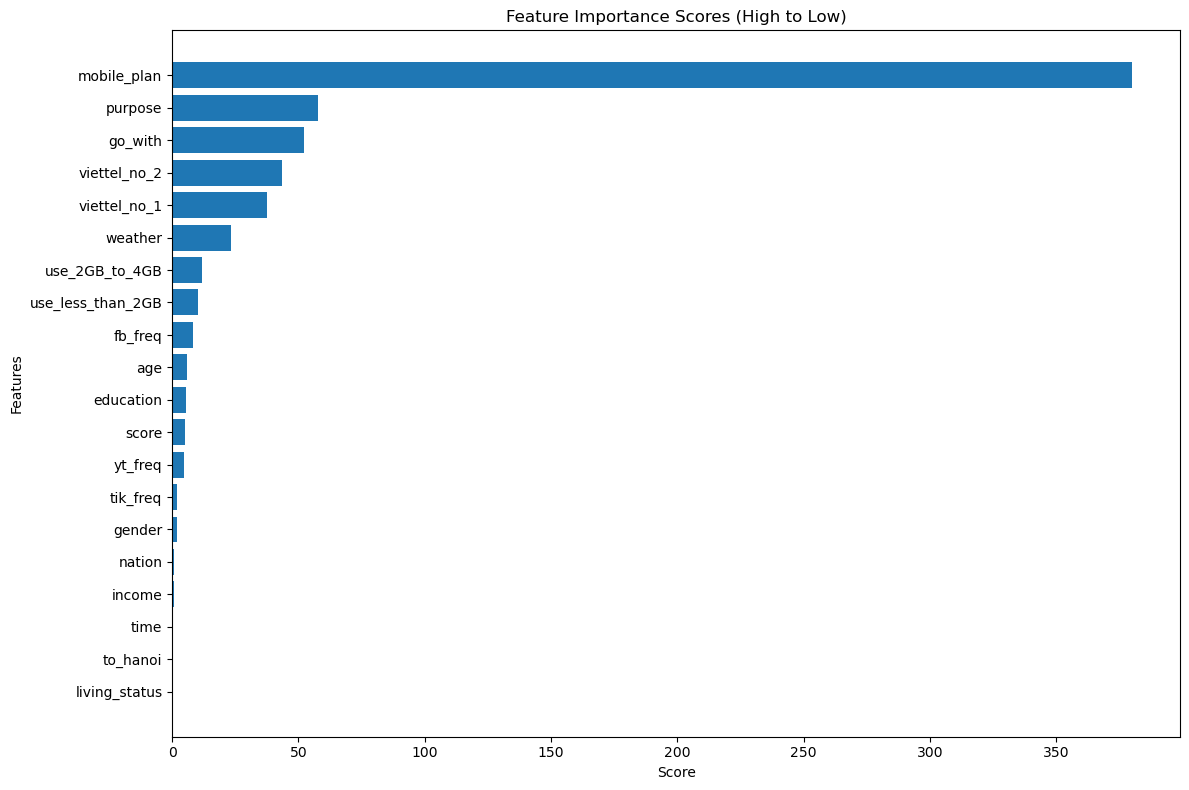

In [172]:
# Sort features by their scores (high to low)
feature_indices = np.argsort(scores)[::1]
sorted_scores = scores[feature_indices]
sorted_features = X.columns[feature_indices]

# Plot sorted feature importance horizontally
plt.figure(figsize=(12, 8))
plt.barh(range(X.shape[1]), sorted_scores, align='center')
plt.yticks(range(X.shape[1]), sorted_features)
plt.xlabel('Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores (High to Low)')
plt.tight_layout()
plt.show()


### 2. Test Model

In [173]:
# Evaluate the model
y_pred = model_rf_fin.predict(X_test_new)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

In [174]:
from sklearn.metrics import classification_report
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     25029
           1       0.97      0.54      0.70      6401

    accuracy                           0.90     31430
   macro avg       0.93      0.77      0.82     31430
weighted avg       0.91      0.90      0.89     31430



The overall accuracy was 90% indicating that the model performed well in general. Recall is lower (0.54), meaning the model misses some real cases of class 1.

In [175]:
accuracy_balance =balanced_accuracy_score(y_test, y_pred)

In [176]:
accuracy_balance

0.7688793076269616

In [177]:
f1

0.6958354239839437

In [178]:
recall

0.5416341196688017

In [179]:
accuracy

0.9035634743875278

In [180]:
precision

0.9727833894500562

# MODEL 2: CLASSIFICATION WITH MOBILE PLAN

In [181]:
from sklearn.neighbors import KNeighborsClassifier

### 1. Create Model

In [182]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

In [183]:
df3.columns

Index(['id', 'name', 'gender', 'age', 'education', 'profession', 'income',
       'nation', 'phone', 'job', 'fb_freq', 'yt_freq', 'use_less_than_2GB',
       'use_2GB_to_4GB', 'living_status', 'living_with_index', 'age_group',
       'income_group', 'tik_freq'],
      dtype='object')

In [184]:
df_merge3 = pd.merge(df1,df2,how ='outer')
df_merge3 = pd.merge(df_merge3,df3[['use_less_than_2GB','use_2GB_to_4GB','id','fb_freq','yt_freq','tik_freq','gender', 'age', 'education', 'profession','living_status','nation']],how ='outer')

In [185]:
df_merge3

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,...,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
0,11156,Travel,Alone,Sunny,13:00,1,0,0,0,0,...,3,0,0,9,Female,21,None,Unemployed,Unmarried,AUSTRALIA
1,11156,Travel,Alone,Sunny,13:00,1,0,0,0,0,...,3,0,0,9,Female,21,None,Unemployed,Unmarried,AUSTRALIA
2,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,...,2,0,0,23,Other,22,None,Unemployed,Unmarried,ENGLAND
3,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,...,2,0,0,23,Other,22,None,Unemployed,Unmarried,ENGLAND
4,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,...,2,0,0,23,Other,22,None,Unemployed,Unmarried,ENGLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,12092,Work,Alone,Sunny,07:00,1,0,0,1,0,...,2,0,0,2,Male,27,Bachelor,Sales & Related,Single,ENGLAND
31426,12092,Work,Alone,Sunny,07:00,1,0,0,1,0,...,2,0,0,2,Male,27,Bachelor,Sales & Related,Single,ENGLAND
31427,12092,Work,Alone,Sunny,07:00,1,0,0,1,0,...,2,0,0,2,Male,27,Bachelor,Sales & Related,Single,ENGLAND
31428,12092,Work,Alone,Sunny,07:00,1,0,0,1,0,...,2,0,0,2,Male,27,Bachelor,Sales & Related,Single,ENGLAND


In [186]:
df_merge3_test = pd.merge(df1_test,df2_test,how ='outer')
df_merge3_test = pd.merge(df_merge3_test,df3_test[['use_less_than_2GB','use_2GB_to_4GB','id','fb_freq','yt_freq','tik_freq','gender', 'age', 'education', 'profession','living_status','nation']],how ='outer')

In [187]:
df_merge3[df_merge3.accept == 1]

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,score,...,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
1,11156,Travel,Alone,Sunny,13:00,1,0,0,0,0,...,3,0,0,9,Female,21,None,Unemployed,Unmarried,AUSTRALIA
4,4297,Travel,Friends,Sunny,09:00,1,1,0,0,0,...,2,0,0,23,Other,22,None,Unemployed,Unmarried,ENGLAND
7,13301,Travel,Friends,Sunny,15:00,1,1,0,0,0,...,2,0,0,23,Female,24,None,Unemployed,Unmarried,KOREA
9,9920,Travel,Friends,Sunny,14:00,1,1,0,0,30,...,2,0,0,21,Female,24,None,Unemployed,Unmarried,DENMARK
10,8424,Travel,Family,Sunny,10:00,1,1,0,0,0,...,3,0,0,22,Female,25,None,Unemployed,Unmarried,BRAZIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,15941,Travel,Family,Sunny,21:00,1,0,0,0,0,...,0,0,0,0,Female,27,Bachelor,Arts Design Entertainment Sports & Media,Married,BRAZIL
31369,16916,Travel,Friends,Sunny,21:00,1,1,0,0,0,...,1,0,0,4,Male,33,Bachelor,Business & Financial,Married,CHINA
31377,13710,Visit,Family,Sunny,19:00,1,1,0,0,0,...,1,1,0,5,Male,35,Bachelor,Business & Financial,Married,KOREA
31380,3476,Visit,Alone,Rainy,19:00,1,0,0,1,25,...,1,1,0,8,Male,34,Bachelor,Business & Financial,Married,AUSTRALIA


In [188]:
df_train_pro = df_merge3.copy()[df_merge3.accept == 1].drop(['accept','time_bin','id','viettel_no_0','weather'],axis = 1)

In [189]:
df_test_pro = df_merge3_test.copy()[df_merge3.accept == 1].drop(['accept','id','viettel_no_0','weather'],axis = 1)

C:\Users\LE TUAN ANH\AppData\Local\Temp\ipykernel_19224\1866318435.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_test_pro = df_merge3_test.copy()[df_merge3.accept == 1].drop(['accept','id','viettel_no_0','weather'],axis = 1)


In [190]:
df_test_pro

,purpose,go_with,time,viettel_no_1,viettel_no_2,to_hanoi,score,mobile_plan,use_less_than_2GB,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
1,Travel,Friends,13:00,1,0,0,4,SOCIALMEDIAGOLD,1,1,0,1,1,Female,34,Masters,Unemployed,Married,KOREA
4,Visit,Alone,17:00,0,0,1,3,DATACALL,0,1,0,1,1,Female,34,Masters,Unemployed,Married,KOREA
7,Travel,Friends,12:00,1,0,0,0,SOCIALMEDIA,2,0,0,21,1,Female,44,Bachelor,Arts Design Entertainment Sports & Media,Divorced,BRAZIL
9,Travel,Friends,18:00,1,0,0,0,DATASILVER,7,0,0,0,4,Female,33,Bachelor,Life Physical Social Science,Married,AUSTRALIA
10,Travel,Family,13:00,0,0,0,14,DATASILVER,7,1,0,1,5,Female,33,Bachelor,Life Physical Social Science,Married,DENMARK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,Visit,Alone,17:00,0,0,0,0,SOCIALMEDIAGOLD,0,1,0,0,1,Female,39,Bachelor,Unemployed,Married,DENMARK
1097,Visit,Family,21:00,1,0,1,0,DATASILVER,1,1,0,0,3,Female,38,Bachelor,Unemployed,Married,AUSTRALIA
1101,Travel,Friends,20:00,1,0,0,0,DATACALL,7,3,0,6,1,Female,34,Bachelor,Education&Training&Library,Single,KOREA
1104,Visit,Alone,22:00,1,1,0,0,SOCIALMEDIAGOLD,5,1,0,7,0,Female,31,Bachelor,Education&Training&Library,Single,DENMARK


In [191]:
df_train_pro

,purpose,go_with,time,viettel_no_1,viettel_no_2,to_hanoi,score,mobile_plan,use_less_than_2GB,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
1,Travel,Alone,13:00,0,0,0,0,DATASILVER,8,3,0,0,9,Female,21,None,Unemployed,Unmarried,AUSTRALIA
4,Travel,Friends,09:00,1,0,0,0,SOCIALMEDIAGOLD,7,2,0,0,23,Other,22,None,Unemployed,Unmarried,ENGLAND
7,Travel,Friends,15:00,1,0,0,0,DATASILVER,5,2,0,0,23,Female,24,None,Unemployed,Unmarried,KOREA
9,Travel,Friends,14:00,1,0,0,30,SOCIALMEDIAGOLD,7,2,0,0,21,Female,24,None,Unemployed,Unmarried,DENMARK
10,Travel,Family,10:00,1,0,0,0,DATASILVER,5,3,0,0,22,Female,25,None,Unemployed,Unmarried,BRAZIL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,Travel,Family,21:00,0,0,0,0,DATACALL,0,0,0,0,0,Female,27,Bachelor,Arts Design Entertainment Sports & Media,Married,BRAZIL
31369,Travel,Friends,21:00,1,0,0,0,SOCIALMEDIAGOLD,20,1,0,0,4,Male,33,Bachelor,Business & Financial,Married,CHINA
31377,Visit,Family,19:00,1,0,0,0,DATASILVER,12,1,1,0,5,Male,35,Bachelor,Business & Financial,Married,KOREA
31380,Visit,Alone,19:00,0,0,1,25,SOCIALMEDIA,15,1,1,0,8,Male,34,Bachelor,Business & Financial,Married,AUSTRALIA


In [192]:
categories_2 = ['go_with', 'purpose','mobile_plan','gender','education','profession','time','living_status','nation']

In [193]:
for col in categories_2:
    df_train_pro[col] = df_train_pro[col].astype('category')
    label_encoders = {}
    for col in categories_2:
        le = LabelEncoder()
        df_train_pro[col] = le.fit_transform(df_train_pro[col])
        label_encoders[col] = le

In [194]:
for col in categories_2:
    df_test_pro[col] = df_test_pro[col].astype('category')
    label_encoders = {}
    for col in categories_2:
        le = LabelEncoder()
        df_test_pro[col] = le.fit_transform(df_test_pro[col])
        label_encoders[col] = le

In [195]:
df_train_pro

,purpose,go_with,time,viettel_no_1,viettel_no_2,to_hanoi,score,mobile_plan,use_less_than_2GB,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
1,0,0,8,0,0,0,0,2,8,3,0,0,9,0,21,4,24,3,0
4,0,2,4,1,0,0,0,4,7,2,0,0,23,2,22,4,24,3,4
7,0,2,10,1,0,0,0,2,5,2,0,0,23,0,24,4,24,3,6
9,0,2,9,1,0,0,30,4,7,2,0,0,21,0,24,4,24,3,3
10,0,1,5,1,0,0,0,2,5,3,0,0,22,0,25,4,24,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31341,0,1,16,0,0,0,0,0,0,0,0,0,0,0,27,1,1,1,1
31369,0,2,16,1,0,0,0,4,20,1,0,0,4,1,33,1,3,1,2
31377,1,1,14,1,0,0,0,2,12,1,1,0,5,1,35,1,3,1,6
31380,1,0,14,0,0,1,25,3,15,1,1,0,8,1,34,1,3,1,0


In [196]:
df_test_pro

,purpose,go_with,time,viettel_no_1,viettel_no_2,to_hanoi,score,mobile_plan,use_less_than_2GB,use_2GB_to_4GB,fb_freq,yt_freq,tik_freq,gender,age,education,profession,living_status,nation
1,0,2,8,1,0,0,4,4,1,1,0,1,1,0,34,3,21,1,3
4,1,0,12,0,0,1,3,0,0,1,0,1,1,0,34,3,21,1,3
7,0,2,7,1,0,0,0,3,2,0,0,21,1,0,44,1,0,0,1
9,0,2,13,1,0,0,0,2,7,0,0,0,4,0,33,1,11,1,0
10,0,1,8,0,0,0,14,2,7,1,0,1,5,0,33,1,11,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1,0,12,0,0,0,0,4,0,1,0,0,1,0,39,1,21,1,2
1097,1,1,16,1,0,1,0,2,1,1,0,0,3,0,38,1,21,1,0
1101,0,2,15,1,0,0,0,0,7,3,0,6,1,0,34,1,5,2,3
1104,1,0,17,1,1,0,0,4,5,1,0,7,0,0,31,1,5,2,2


In [197]:
var_columns = [x for x in df_train_pro.columns if x not in ['mobile_plan']]

In [198]:
X = df_train_pro.loc[:, var_columns]
y = df_train_pro.loc[:, 'mobile_plan']

In [199]:
X_test = df_train_pro.loc[:, var_columns]
y_test = df_train_pro.loc[:, 'mobile_plan']

In [200]:
y.value_counts()

3    1685
2    1641
4    1487
0     853
1     735
Name: mobile_plan, dtype: int64

Text(0.5, 1.0, 'Distribution of mobile_plan')

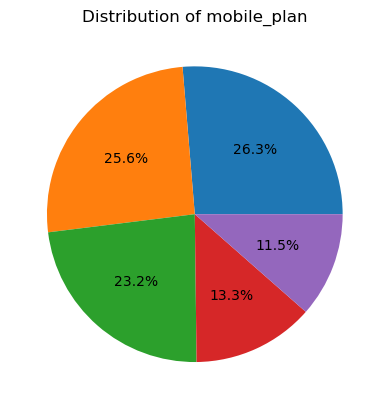

In [201]:
fig,axes = plt.subplots(1,1)
axes.pie(y.value_counts(), autopct='%1.1f%%')
axes.set_title("Distribution of mobile_plan")

In [202]:
from imblearn.over_sampling import SVMSMOTE
# Khởi tạo SVMSMOTE với random_state để tái hiện kết quả
smote = SVMSMOTE(random_state=42)

# Áp dụng SVMSMOTE lên dữ liệu
X_res, y_res = smote.fit_resample(X, y)


In [203]:
# Split data for initial train/test
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Model with k-fold cross-validation and GridSearchCV
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
model = RandomForestClassifier(random_state=42)

# Parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [205]:

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [206]:
model_rf_fin_pro = grid_search.best_estimator_

In [207]:
# Evaluate the best model
y_pred = model_rf_fin_pro.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print(classification_report(y_valid, y_pred))

[[ 40   4  51  48  44]
 [  9  35  32  38  24]
 [ 18   5 186  68  58]
 [ 21  18  70 157  66]
 [ 18   9  39  75 148]]
              precision    recall  f1-score   support

           0       0.38      0.21      0.27       187
           1       0.49      0.25      0.33       138
           2       0.49      0.56      0.52       335
           3       0.41      0.47      0.44       332
           4       0.44      0.51      0.47       289

    accuracy                           0.44      1281
   macro avg       0.44      0.40      0.41      1281
weighted avg       0.44      0.44      0.43      1281



The overall accuracy of the model was 44%, indicating relatively low performance. The F1-Score tends to be average across classes.

In [208]:
accuracy_balance =balanced_accuracy_score(y_valid, y_pred)

In [209]:
accuracy_balance 

0.40155062104539574

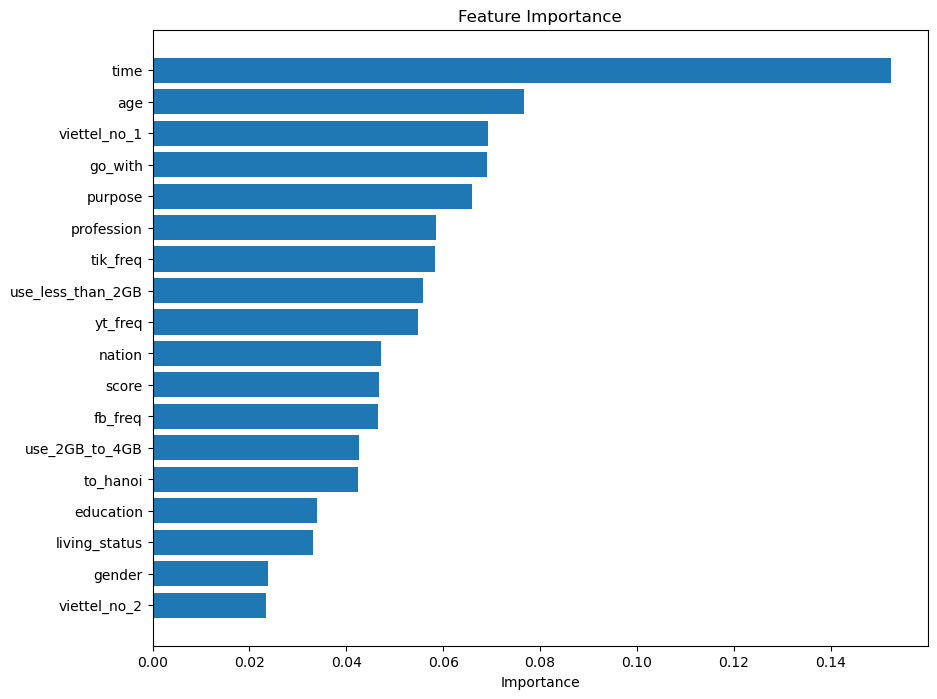

In [210]:
# Get feature importance from the trained model
feature_importance = model_rf_fin_pro.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create DataFrame for easy sorting and graphing
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

# Draw a feature importance chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], align='center')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()

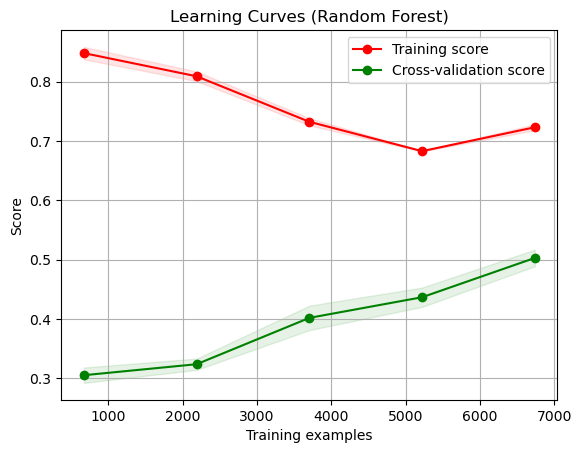

In [211]:
# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves (Random Forest)"
plot_learning_curve(model_rf_fin_pro, title, X_res, y_res, cv=kfold)
plt.show()

The difference between Training Score and Cross_validation Score tends to decrease at training data size of 6000 with relative Score.

=> The phenomenon of overfitting and underfitting is relatively low

### 2. Test Model

In [212]:
y_pred = model_rf_fin_pro.predict(X_test)

In [213]:
# Evaluate the best model
y_pred = model_rf_fin_pro.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 377   21  176  171  108]
 [  47  263  154  152  119]
 [  46   19 1219  202  155]
 [  51   43  195 1192  204]
 [  33   28  169  202 1055]]
              precision    recall  f1-score   support

           0       0.68      0.44      0.54       853
           1       0.70      0.36      0.47       735
           2       0.64      0.74      0.69      1641
           3       0.62      0.71      0.66      1685
           4       0.64      0.71      0.67      1487

    accuracy                           0.64      6401
   macro avg       0.66      0.59      0.61      6401
weighted avg       0.65      0.64      0.63      6401



The model had an overall accuracy of 64%, with clear differences in performance between classes. The F1-score of each class also represents the balance between Precision and Recall.

In [214]:
accuracy_balance =balanced_accuracy_score(y_test, y_pred)

In [215]:
accuracy_balance

0.5919065913951552